# Reading the dataset


In [105]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
unzip:  cannot find or open house-prices-advanced-regression-techniques.zip, house-prices-advanced-regression-techniques.zip.zip or house-prices-advanced-regression-techniques.zip.ZIP.


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Train Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008 

# Data preproccessing and visulization:train_data

In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [108]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [109]:
train_data= pd.DataFrame(train_data)
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [110]:
missing_values =train_data.isnull().sum()
missing_values
#to know if thera null values

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [111]:
train_datashape=train_data.shape
train_data.shape


(1460, 81)

In [112]:
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)
#to present all features that have missing value

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


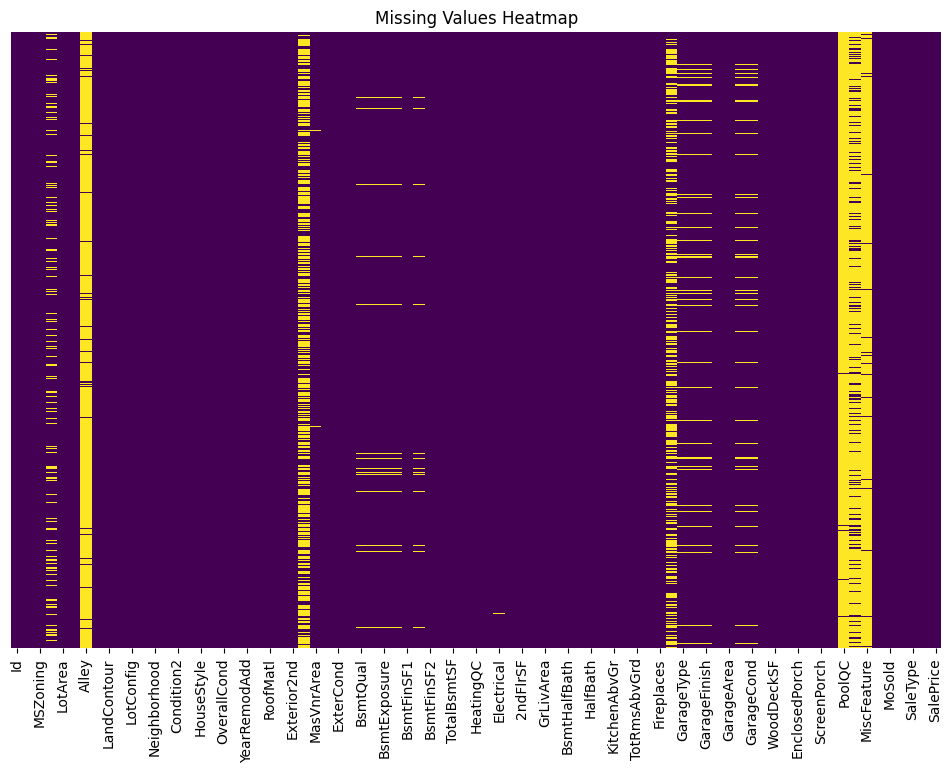

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = train_data.isnull()

plt.figure(figsize=(12, 8))
sns.heatmap(missing_values, cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()
#to know if there any missing value ,the yellow area represent values and the dark or purple area represent that there are null values.

In [114]:
train_data_without_target = train_data.drop('SalePrice', axis=1)
print(train_data_without_target.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD

In [115]:
numeric_columns = train_data_without_target.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [116]:
train_data_without_target = train_data.drop(columns=['Alley', 'PoolQC','Fence','MiscFeature'])
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [117]:
train_data_without_target[numeric_columns] = train_data_without_target[numeric_columns].fillna(train_data_without_target[numeric_columns].mean())
train_data_without_target

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [118]:
missing_values = train_data_without_target.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

MasVnrType      872
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [119]:
categorical_cols = train_data_without_target.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [120]:
for col in categorical_cols:
    train_data_without_target[col] = train_data_without_target[col].fillna(train_data_without_target[col].mode()[0])
    print(train_data_without_target[col])

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object
0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1460, dtype: object
0       Reg
1       Reg
2       IR1
3       IR1
4       IR1
       ... 
1455    Reg
1456    Reg
1457    Reg
1458    Reg
1459    Reg
Name: LotShape, Length: 1460, dtype: object
0       Lvl
1       Lvl
2       Lvl
3       Lvl
4       Lvl
       ... 
1455    Lvl
1456    Lvl
1457    Lvl
1458    Lvl
1459    Lvl
Name: LandContour, Length: 1460, dtype: object
0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
1455    AllPub
1456    AllPub
1457    AllPub
1458    AllPub
1459    AllPub
Name: Utilities, Length: 1460, dtype: object
0       Inside
1          FR2
2       Inside
3       Corner
4          FR2
         .

In [121]:
missing_values = train_data_without_target.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


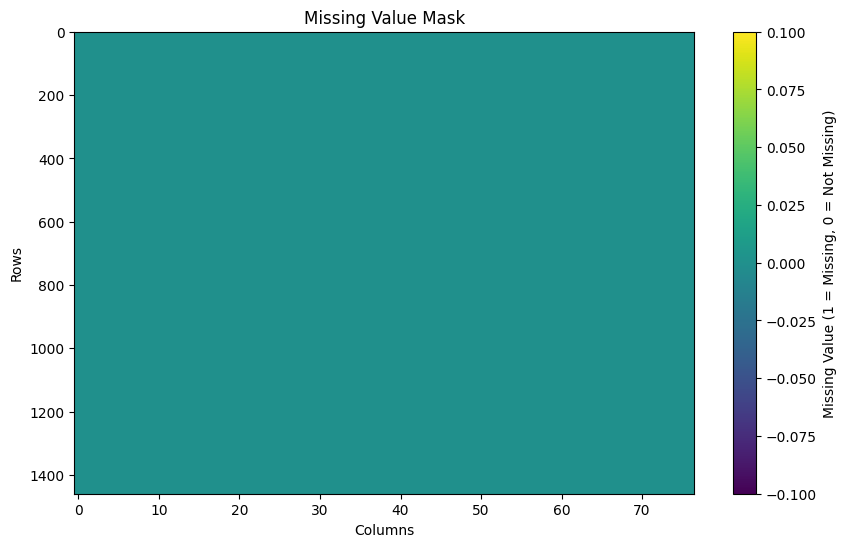

In [122]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.imshow(train_data_without_target.isnull(), aspect='auto', cmap='viridis', interpolation='none')
plt.colorbar(label='Missing Value (1 = Missing, 0 = Not Missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Value Mask')
plt.show()


In [123]:
duplicates = train_data_without_target.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool


In [124]:
num_duplicates = train_data_without_target.duplicated().sum()
num_duplicates

0

In [125]:
import pandas as pd
import numpy as np
from math import sqrt

train_data_without_target[numeric_columns] = train_data_without_target[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(train_data_without_target[numeric_columns].isna().sum())

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


In [126]:
def calc_mean(arr):
    sum = 0
    n = len(arr)
    for i in arr:
        sum += i
    return sum / n

def calc_std(arr, mean):
    variance = 0
    for i in arr:
        variance += pow((i - mean), 2)
    return sqrt(variance / len(arr))  # تقسيم الفاريانس على العدد الكلي


In [127]:
train_data_cleaned = train_data.dropna(subset=numeric_columns)

print(train_data_cleaned[numeric_columns].isna().sum())


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


In [128]:
numeric_columns = train_data_without_target.select_dtypes(include=['number']).columns
numeric_columns_to_scale = numeric_columns.drop('Id', errors='ignore')

from sklearn.preprocessing import StandardScaler
train_data_scaled = train_data_without_target.copy()

scaler = StandardScaler()

# Fit and transform on the selected numeric columns
scaled_numeric = scaler.fit_transform(train_data_without_target[numeric_columns_to_scale])

# Assign scaled values back to the DataFrame
train_data_scaled[numeric_columns_to_scale] = scaled_numeric

print(train_data_scaled.head())


   Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0   1    0.073375       RL    -0.229372 -0.207142   Pave      Reg         Lvl   
1   2   -0.872563       RL     0.451936 -0.091886   Pave      Reg         Lvl   
2   3    0.073375       RL    -0.093110  0.073480   Pave      IR1         Lvl   
3   4    0.309859       RL    -0.456474 -0.096897   Pave      IR1         Lvl   
4   5    0.073375       RL     0.633618  0.375148   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  PoolArea  \
0    AllPub    Inside  ...     -0.359325 -0.116339   -0.270208 -0.068692   
1    AllPub       FR2  ...     -0.359325 -0.116339   -0.270208 -0.068692   
2    AllPub    Inside  ...     -0.359325 -0.116339   -0.270208 -0.068692   
3    AllPub    Corner  ...      4.092524 -0.116339   -0.270208 -0.068692   
4    AllPub       FR2  ...     -0.359325 -0.116339   -0.270208 -0.068692   

    MiscVal    MoSold    YrSold  SaleType  SaleCondition

In [129]:
numeric_columns = train_data_without_target.select_dtypes(include=['number']).columns
from sklearn.preprocessing import StandardScaler

train_data_scaled = train_data_without_target.copy()
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(train_data_without_target[numeric_columns]) # Select numeric data for scaling

train_data_scaled[numeric_columns] = scaled_numeric # Assign scaled values back
print(train_data_scaled.head())

         Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape  \
0 -1.730865    0.073375       RL    -0.229372 -0.207142   Pave      Reg   
1 -1.728492   -0.872563       RL     0.451936 -0.091886   Pave      Reg   
2 -1.726120    0.073375       RL    -0.093110  0.073480   Pave      IR1   
3 -1.723747    0.309859       RL    -0.456474 -0.096897   Pave      IR1   
4 -1.721374    0.073375       RL     0.633618  0.375148   Pave      IR1   

  LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0         Lvl    AllPub    Inside  ...     -0.359325 -0.116339   -0.270208   
1         Lvl    AllPub       FR2  ...     -0.359325 -0.116339   -0.270208   
2         Lvl    AllPub    Inside  ...     -0.359325 -0.116339   -0.270208   
3         Lvl    AllPub    Corner  ...      4.092524 -0.116339   -0.270208   
4         Lvl    AllPub       FR2  ...     -0.359325 -0.116339   -0.270208   

   PoolArea   MiscVal    MoSold    YrSold  SaleType  SaleCondition  SalePrice  


In [130]:
numeric_columns = train_data_cleaned.select_dtypes(include=['int64', 'float64'])

mean_1 = calc_mean(numeric_columns.values.flatten())
std_1 = calc_std(numeric_columns.values.flatten(), mean_1)

print("Mean:", mean_1)
print("Standard Deviation:", std_1)


Mean: 5539.350321611343
Standard Deviation: 32574.39225838704


In [131]:
import numpy as np

def calc_z_score(arr, mean, std):
    return (arr - mean) / std

numeric_columns = train_data_cleaned.select_dtypes(include=['int64', 'float64'])

cleaned_data = train_data_cleaned.copy()

for column in numeric_columns.columns:
    mean_col = numeric_columns[column].mean()
    std_col = numeric_columns[column].std()

    z_scores = calc_z_score(numeric_columns[column], mean_col, std_col)

    cleaned_data = cleaned_data[(z_scores >= -3) & (z_scores <= 3)]

print(f"Shape of data after removing outliers: {cleaned_data.shape}")


Shape of data after removing outliers: (792, 81)


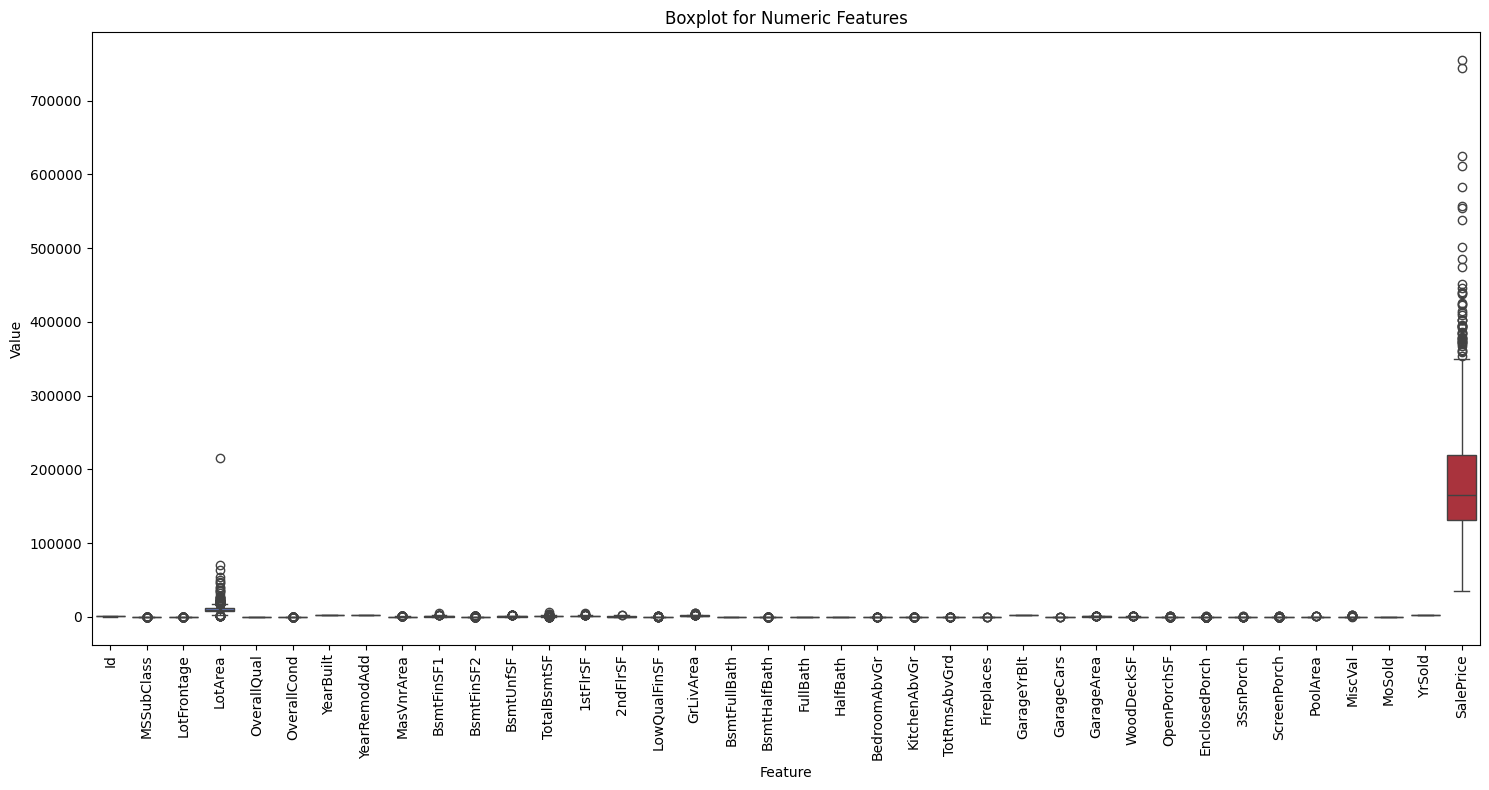

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = train_data_cleaned.select_dtypes(include=['int64', 'float64'])

numeric_data_melted = numeric_columns.melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_data_melted, x='Feature', y='Value', palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Boxplot for Numeric Features")
plt.tight_layout()
plt.show()


# Test_data preproccessing

In [133]:
#head
print(test_data.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [134]:
test_data.values

array([[1461, 20, 'RH', ..., 2010, 'WD', 'Normal'],
       [1462, 20, 'RL', ..., 2010, 'WD', 'Normal'],
       [1463, 60, 'RL', ..., 2010, 'WD', 'Normal'],
       ...,
       [2917, 20, 'RL', ..., 2006, 'WD', 'Abnorml'],
       [2918, 85, 'RL', ..., 2006, 'WD', 'Normal'],
       [2919, 60, 'RL', ..., 2006, 'WD', 'Normal']], dtype=object)

In [135]:
# tail
test_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [136]:
#shape
test_data.shape


(1459, 80)

In [137]:
#info

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [138]:
# finding missing values
test_data.isnull().sum()



,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [139]:
test_data.isnull().sum()/test_data.shape[0]*100

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.274160
LotFrontage,15.558602
LotArea,0.000000
...,...
MiscVal,0.000000
MoSold,0.000000
YrSold,0.000000
SaleType,0.068540


In [140]:
#finding duplicates
test_data.duplicated().sum()

0

In [141]:
#identifiying values
test_data.nunique()

,0
Id,1459
MSSubClass,16
MSZoning,5
LotFrontage,115
LotArea,1106
...,...
MiscVal,26
MoSold,12
YrSold,5
SaleType,9


In [142]:
for i in test_data.select_dtypes(include="object").columns:
   print(test_data[i].value_counts())
   print("***"*10)

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64
******************************
Street
Pave    1453
Grvl       6
Name: count, dtype: int64
******************************
Alley
Grvl    70
Pave    37
Name: count, dtype: int64
******************************
LotShape
Reg    934
IR1    484
IR2     35
IR3      6
Name: count, dtype: int64
******************************
LandContour
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: count, dtype: int64
******************************
Utilities
AllPub    1457
Name: count, dtype: int64
******************************
LotConfig
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: count, dtype: int64
******************************
LandSlope
Gtl    1396
Mod      60
Sev       3
Name: count, dtype: int64
******************************
Neighborhood
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sa

In [143]:
#descriptive statistics
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [144]:
test_data.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


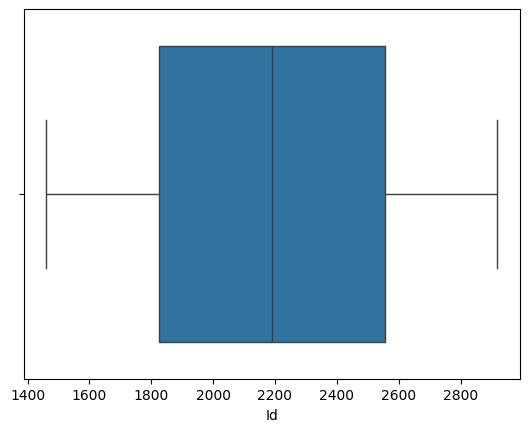

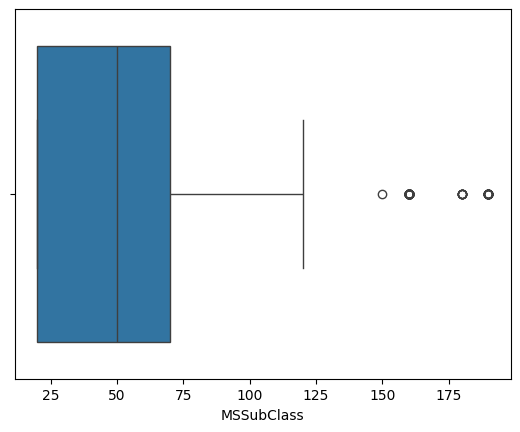

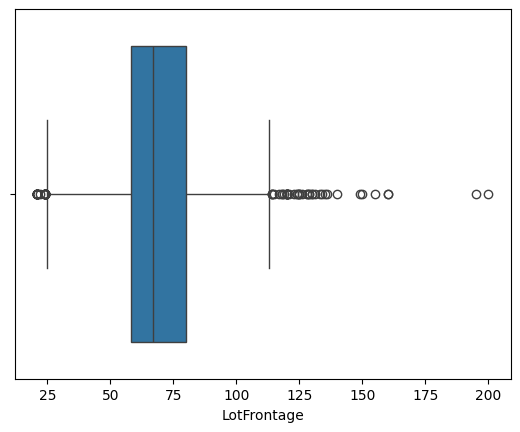

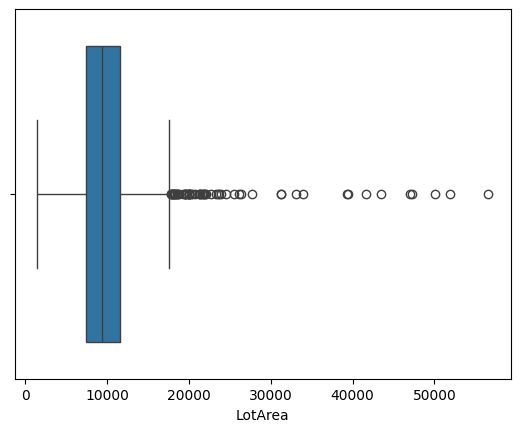

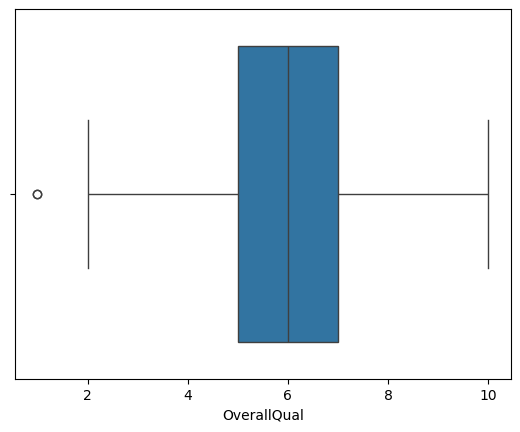

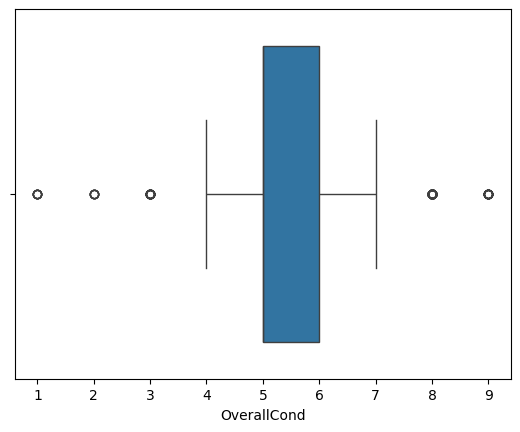

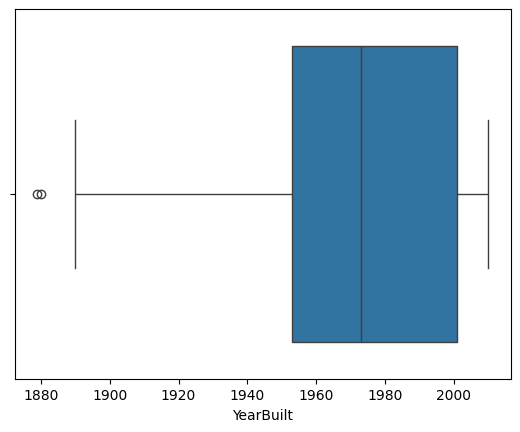

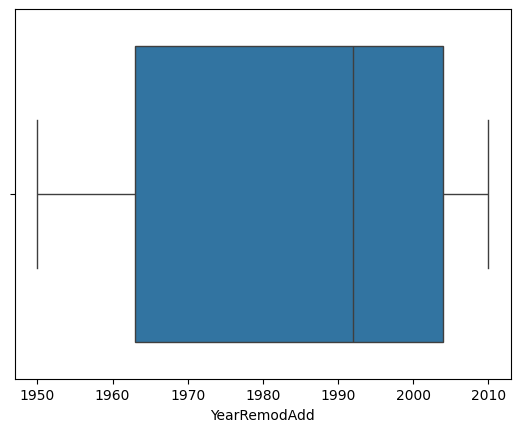

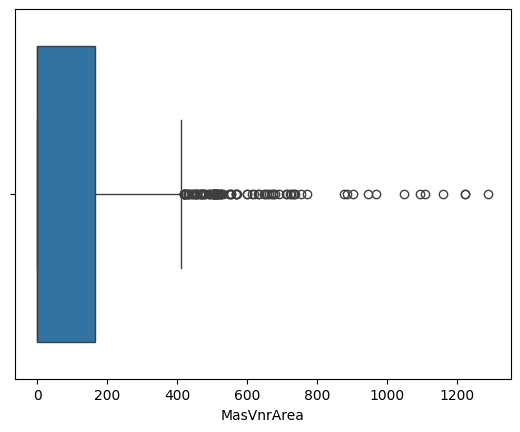

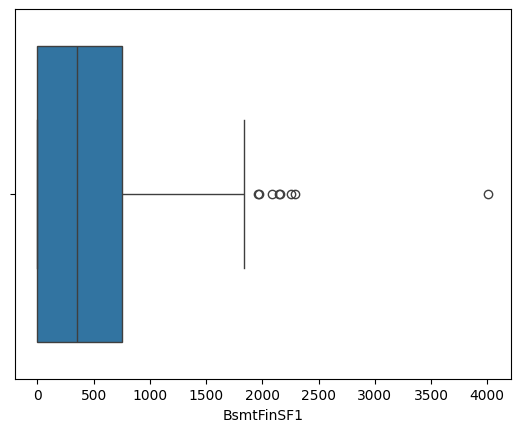

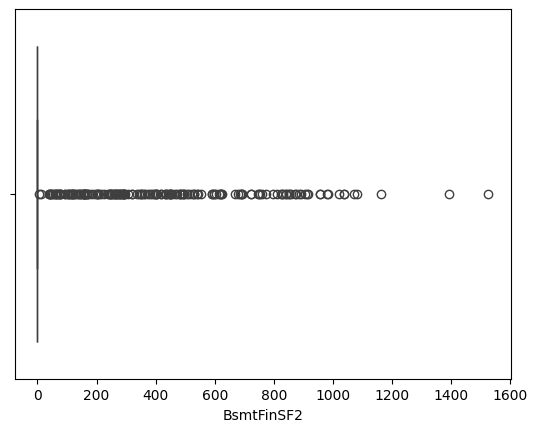

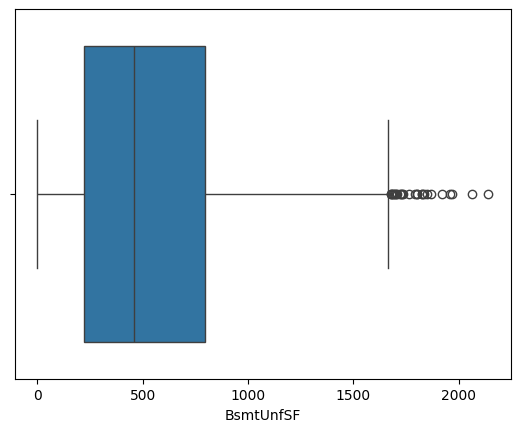

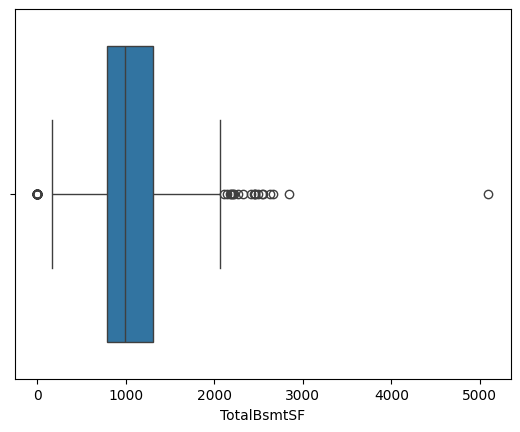

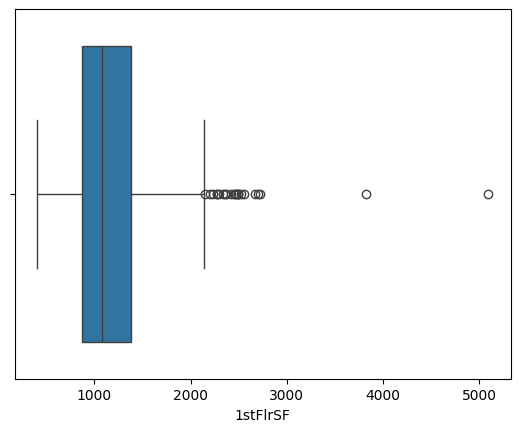

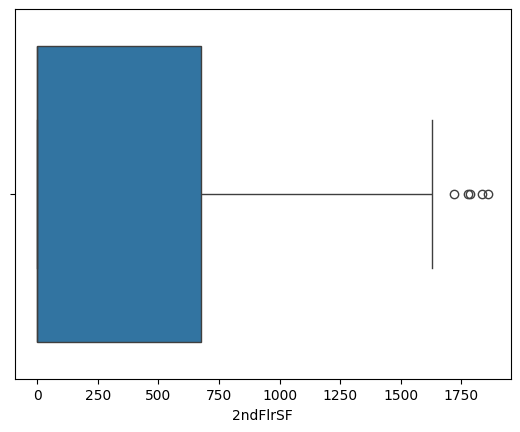

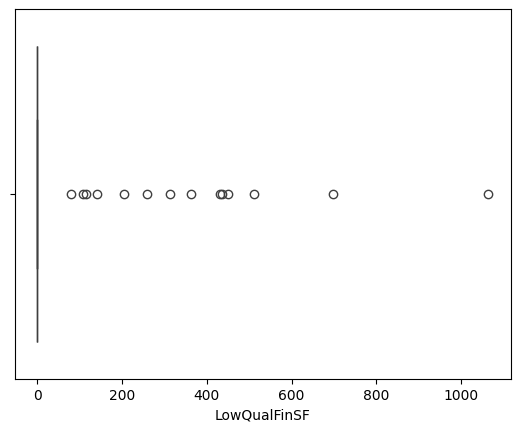

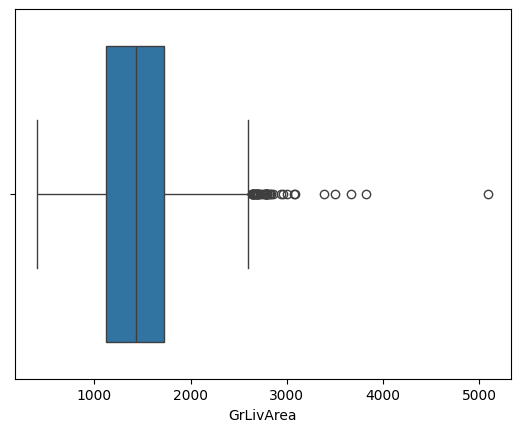

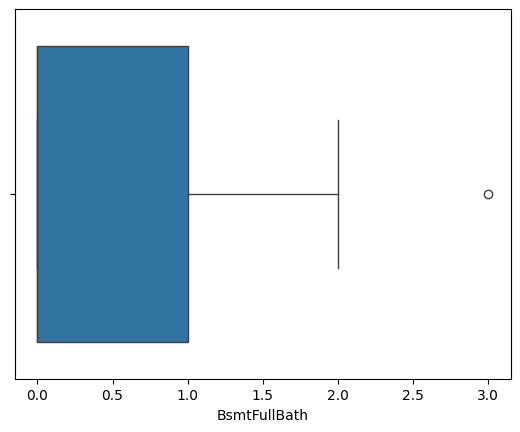

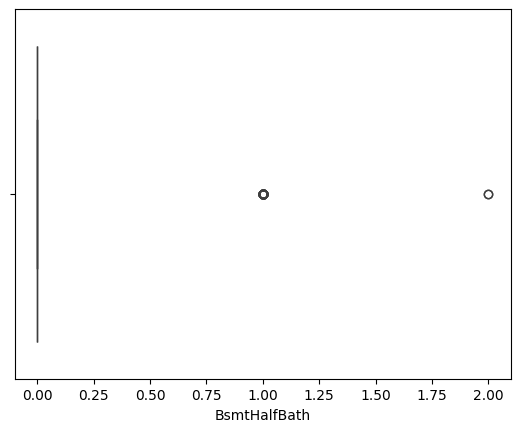

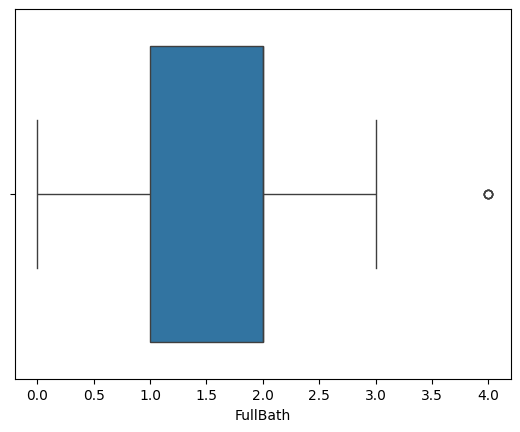

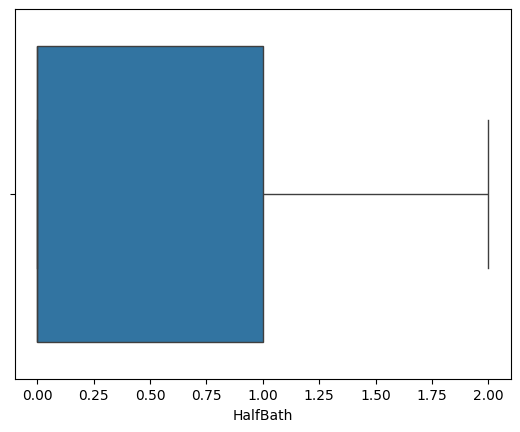

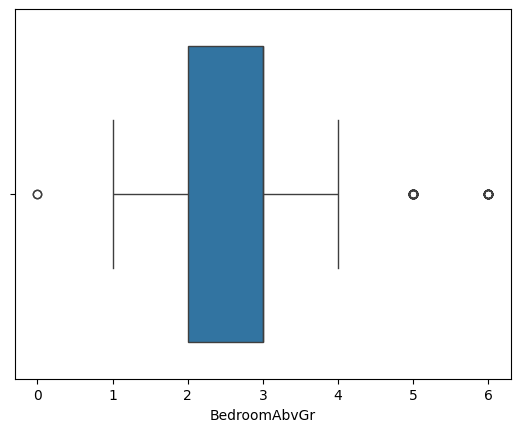

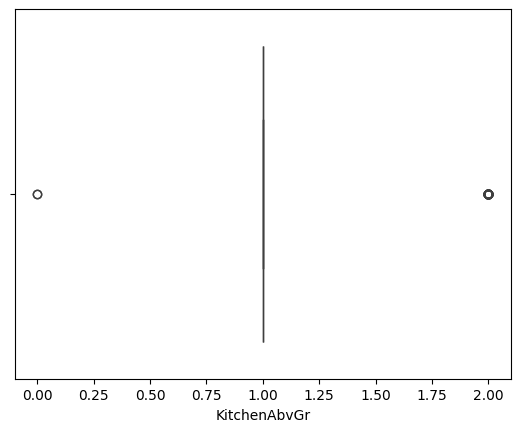

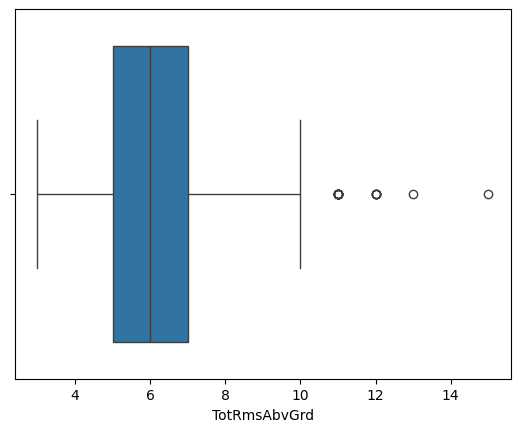

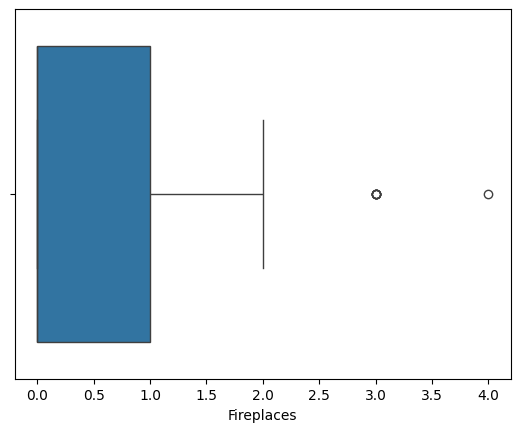

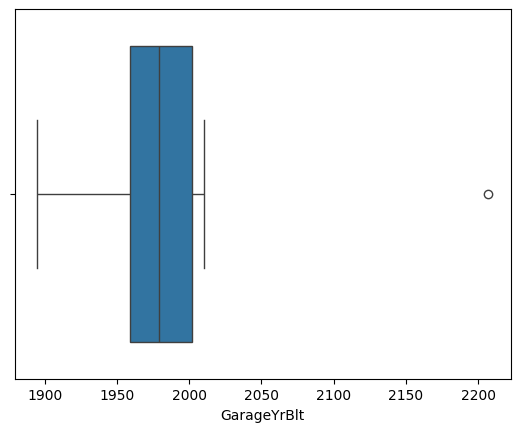

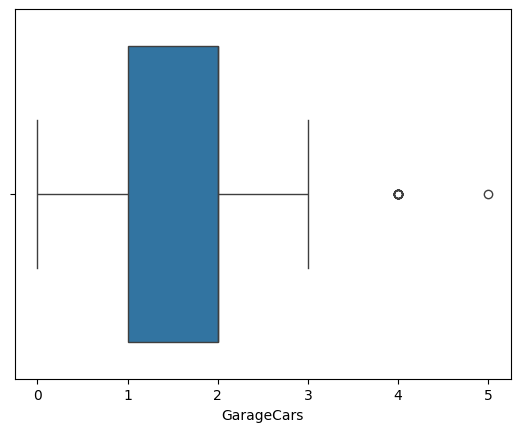

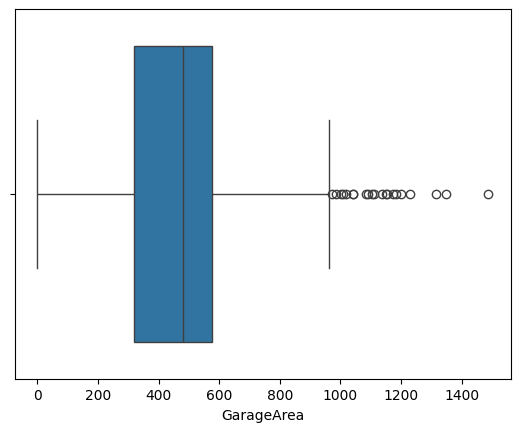

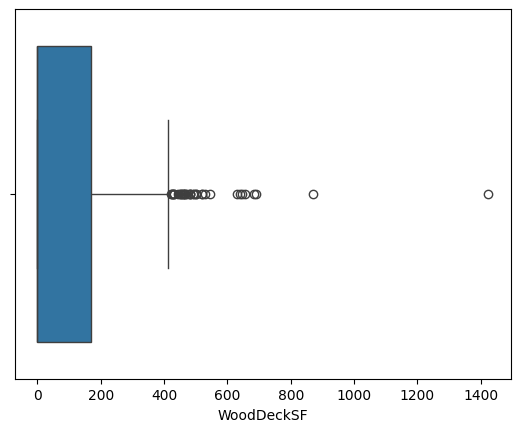

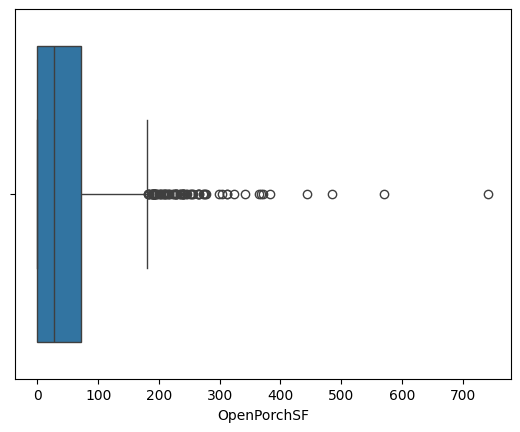

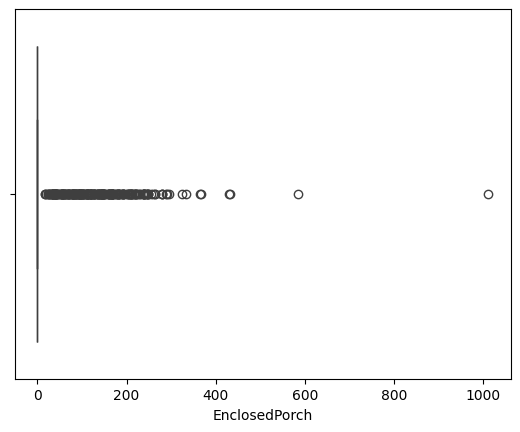

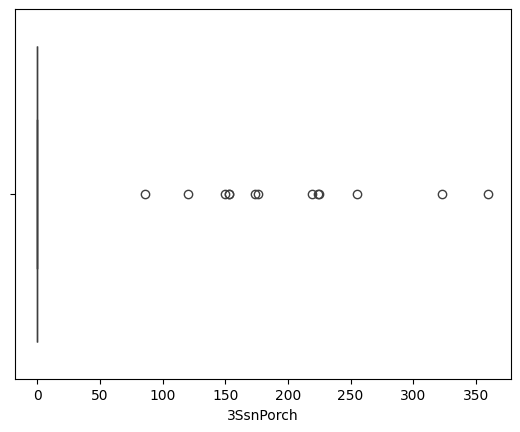

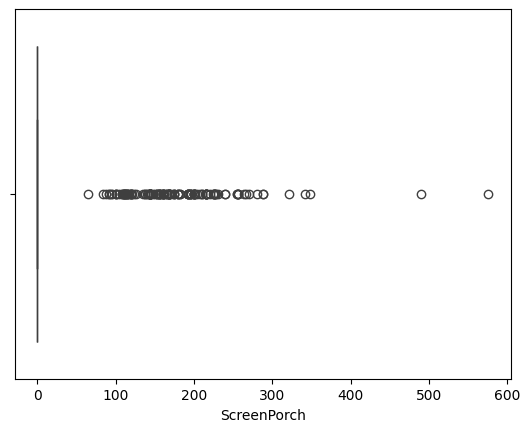

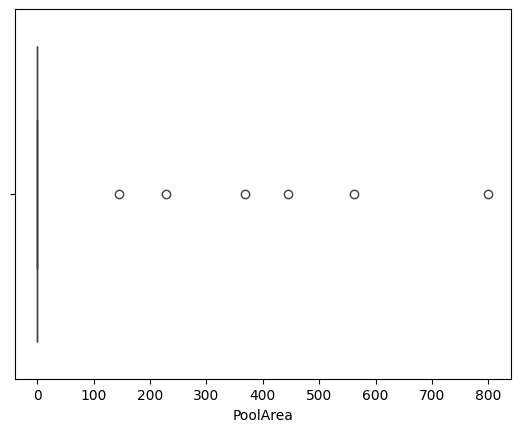

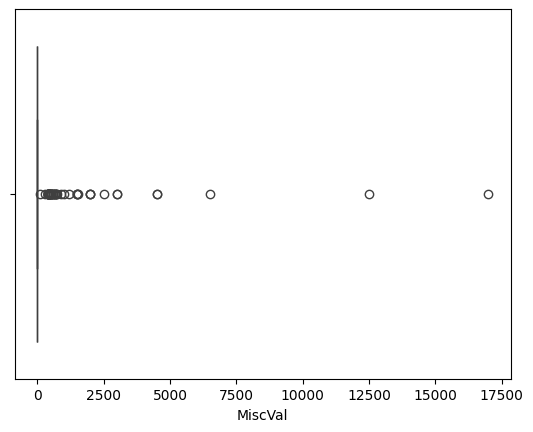

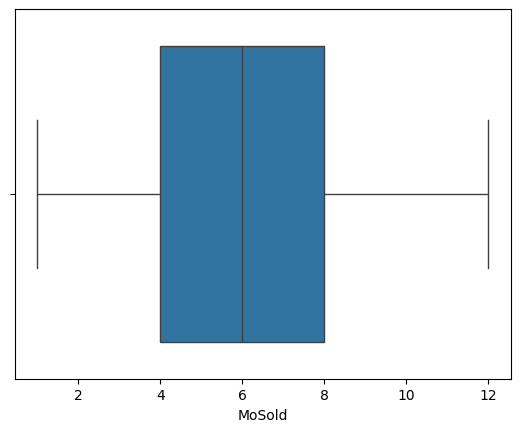

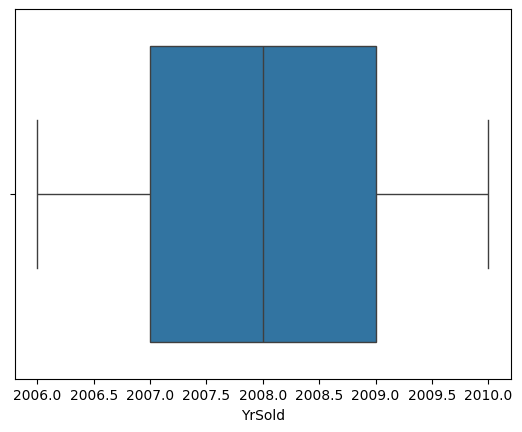

In [145]:
#Boxplo-to-identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in test_data.select_dtypes(include="number").columns:
    sns.boxplot(data=test_data,x=i)
    plt.show()

In [146]:
test_data.select_dtypes(include="number").columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [147]:
#correlations
s=test_data.select_dtypes(include="number").corr()
print(s)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004993     0.009930  0.051492    -0.064887   
MSSubClass     0.004993    1.000000    -0.450505 -0.359537     0.034690   
LotFrontage    0.009930   -0.450505     1.000000  0.644608     0.182870   
LotArea        0.051492   -0.359537     0.644608  1.000000     0.107989   
OverallQual   -0.064887    0.034690     0.182870  0.107989     1.000000   
OverallCond    0.009553   -0.071768    -0.092312 -0.103402    -0.095874   
YearBuilt     -0.058647    0.040848     0.122356  0.048314     0.621910   
YearRemodAdd  -0.079437    0.046319     0.092603  0.036907     0.591267   
MasVnrArea    -0.021424   -0.012186     0.251533  0.188691     0.453991   
BsmtFinSF1    -0.045966   -0.058775     0.204621  0.185470     0.322583   
BsmtFinSF2     0.015862   -0.079093     0.046824  0.054199    -0.028199   
BsmtUnfSF      0.001203   -0.111080     0.092031  0.071681     0.243070   
TotalBsmtSF   -0.039731  

In [148]:
#missing values
test_data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [149]:
test_data.fillna(test_data.LotFrontage.median(),inplace=True)

In [150]:
test_data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [151]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [152]:
#decide whether to do outliers tratment or not , if do how?

In [153]:
 test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [154]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [155]:
wisker(test_data['MSSubClass'])

(-55.0, 145.0)

In [156]:
for i in ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']:
     lw,uw=wisker(test_data[i])
     test_data[i]=np.where(test_data[i]<lw,lw,test_data[i])
     test_data[i]=np.where(test_data[i]>uw,uw,test_data[i])


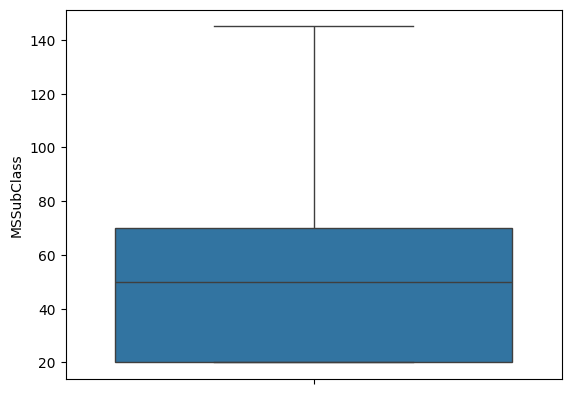

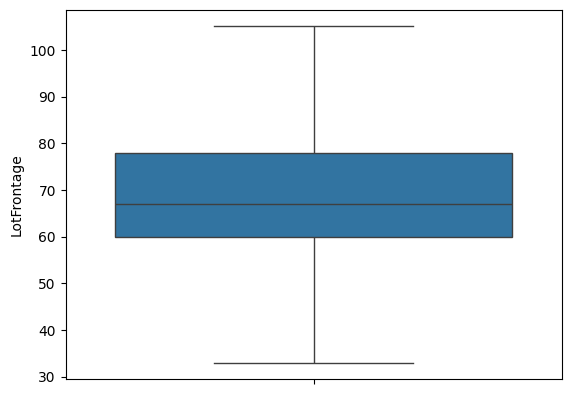

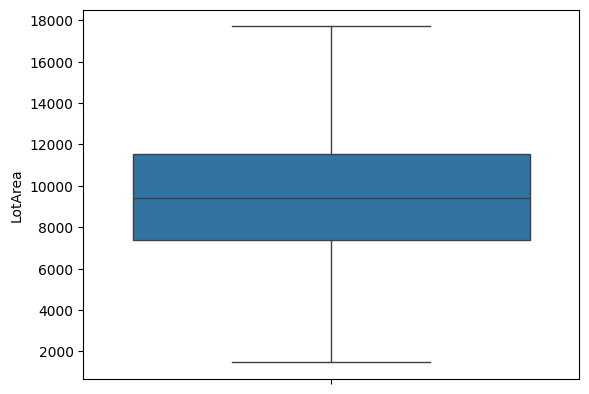

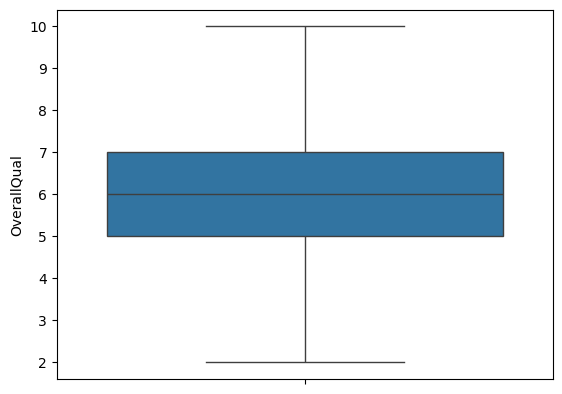

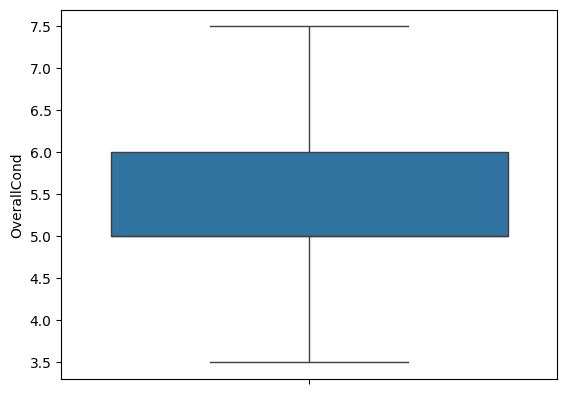

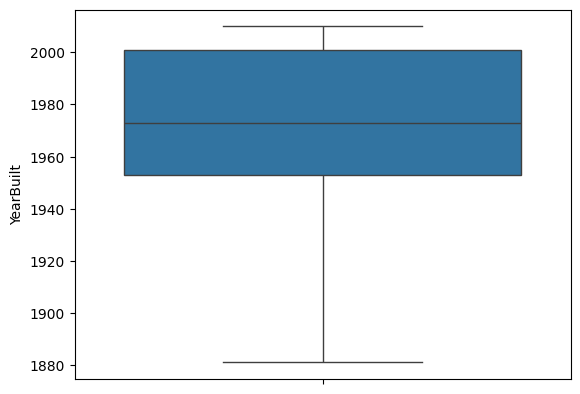

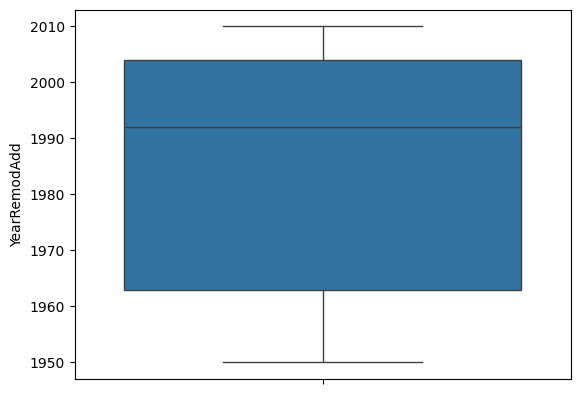

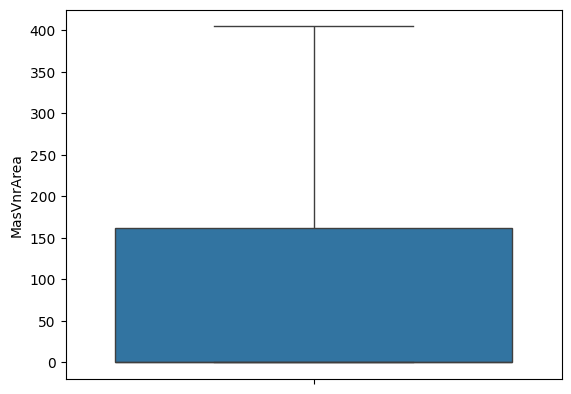

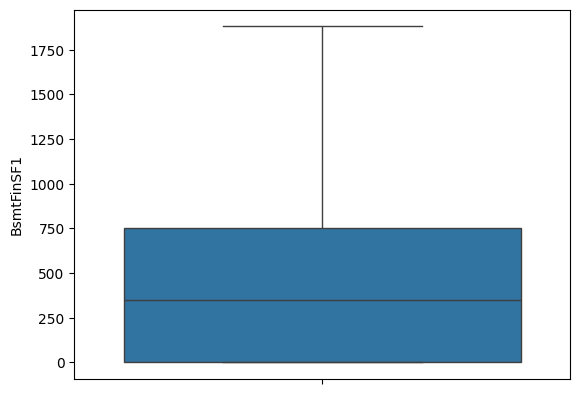

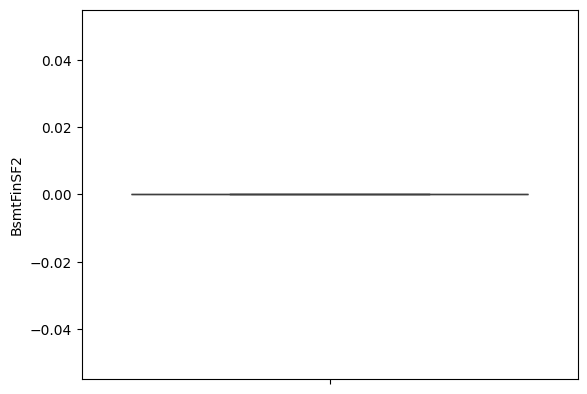

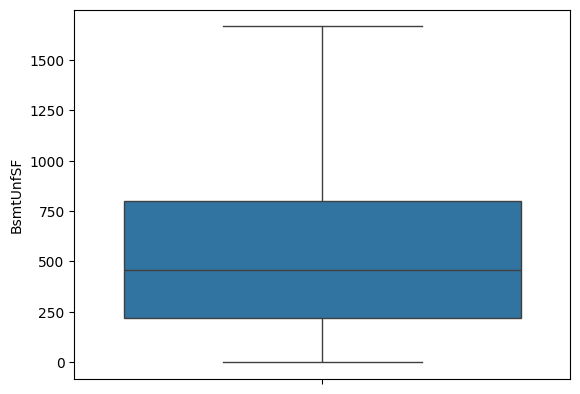

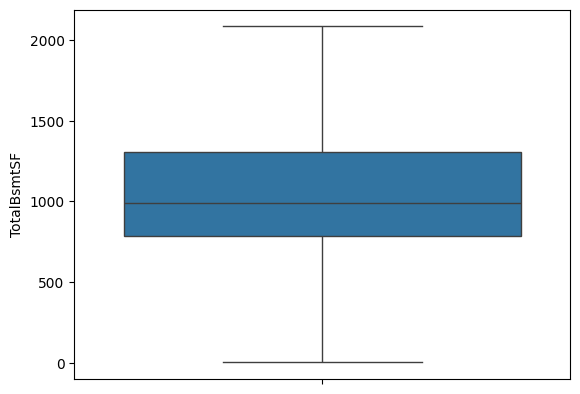

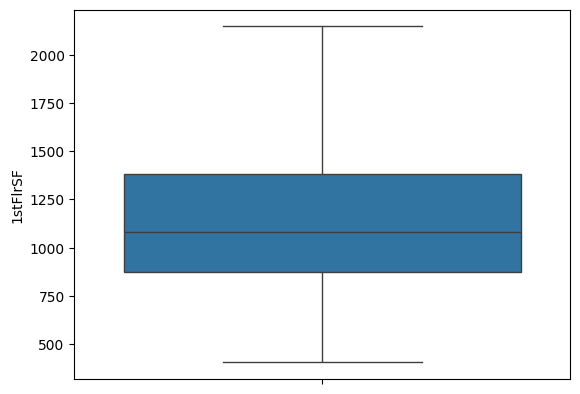

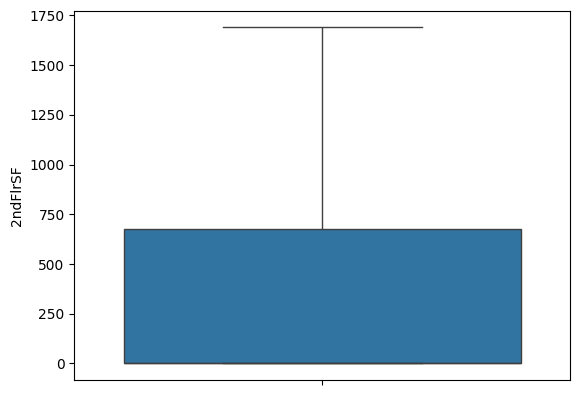

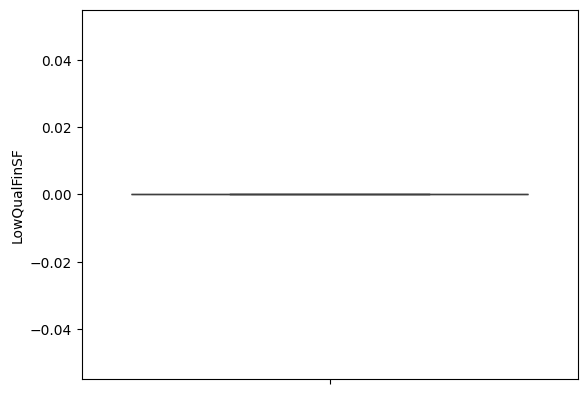

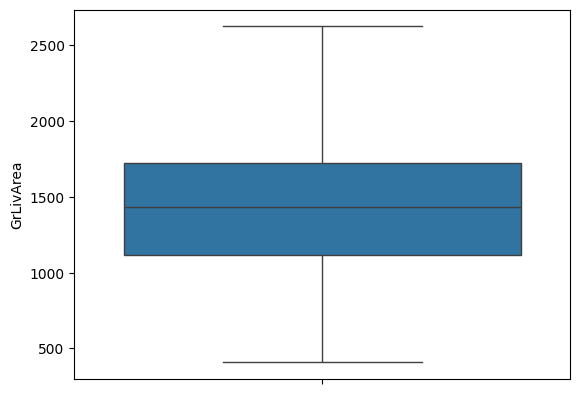

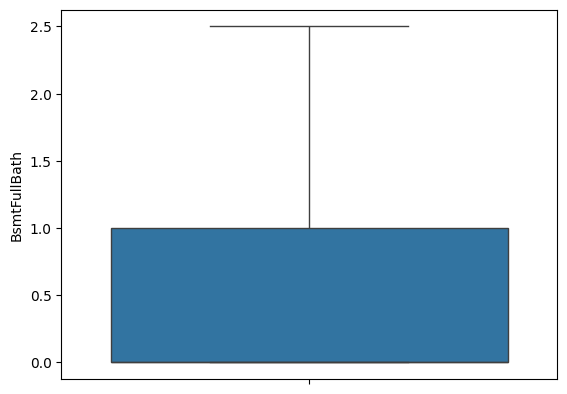

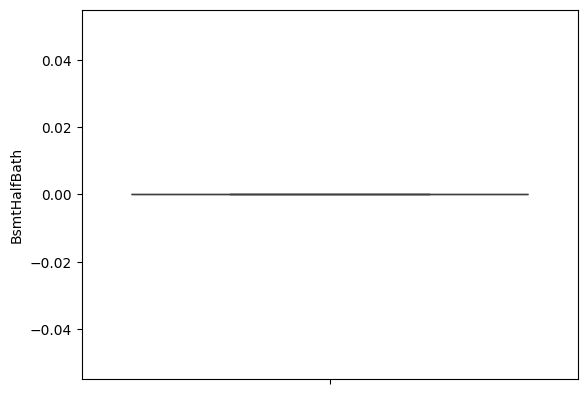

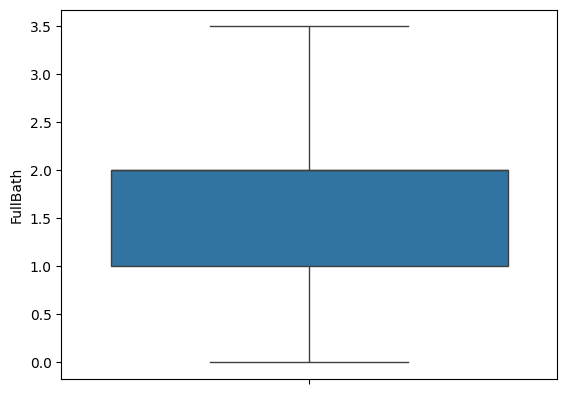

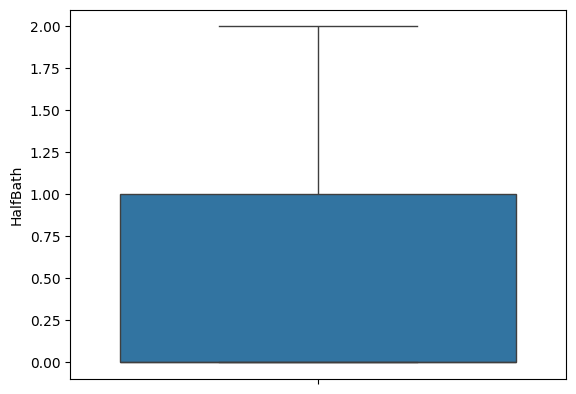

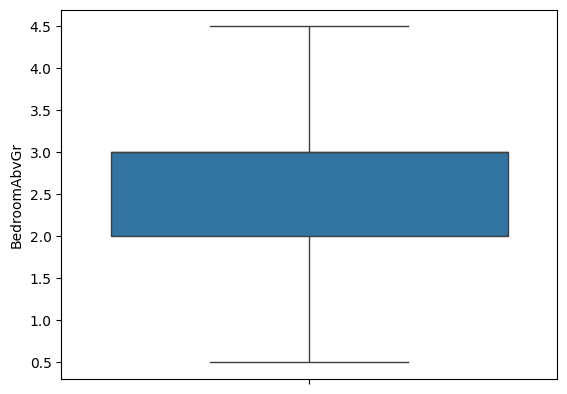

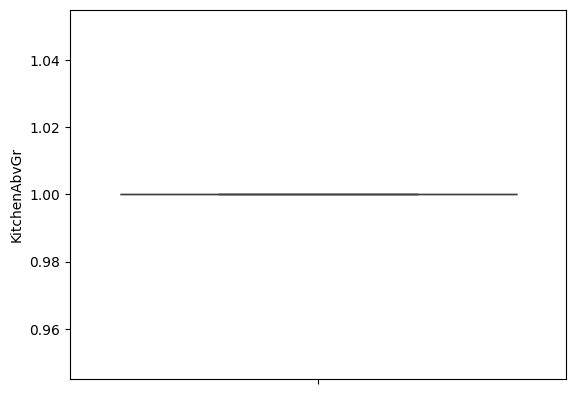

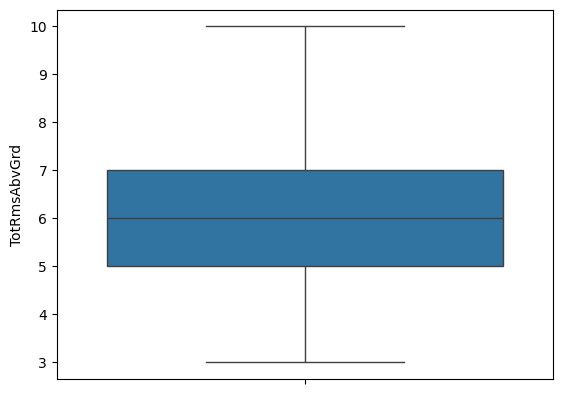

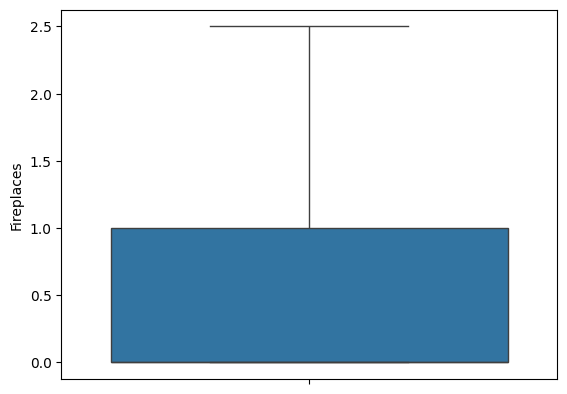

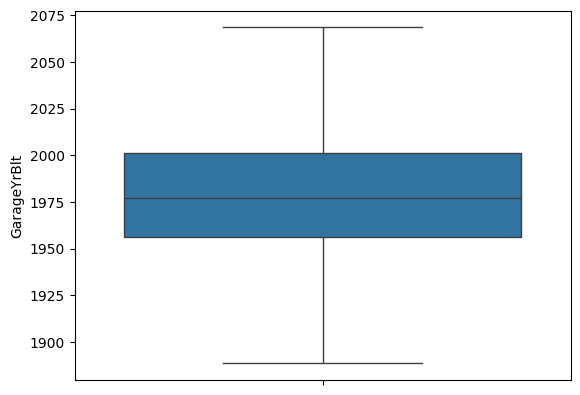

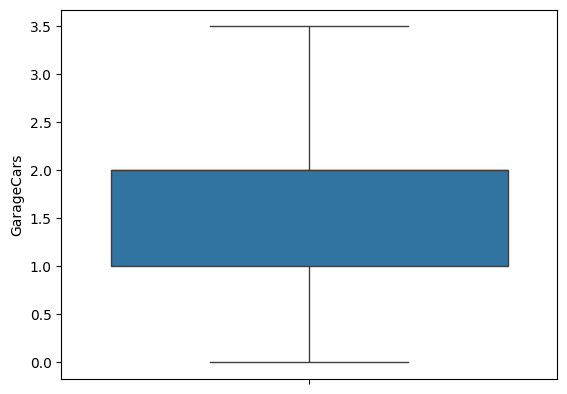

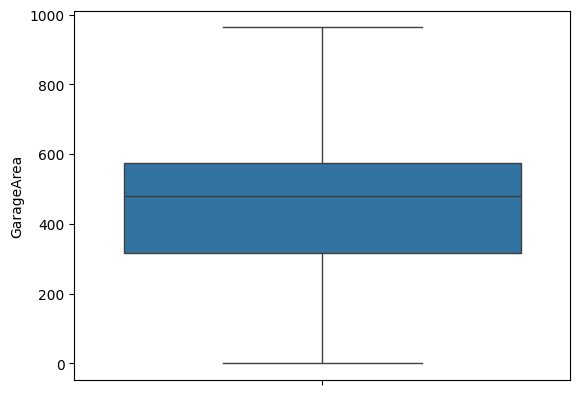

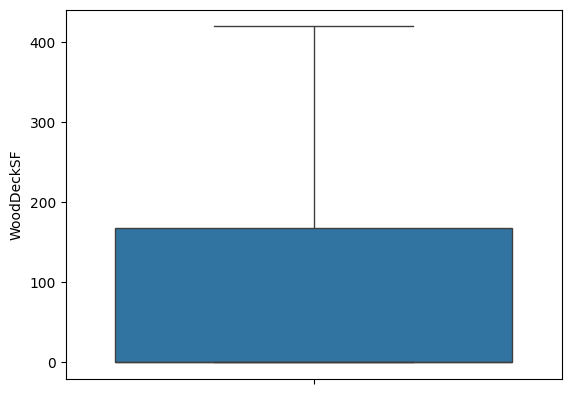

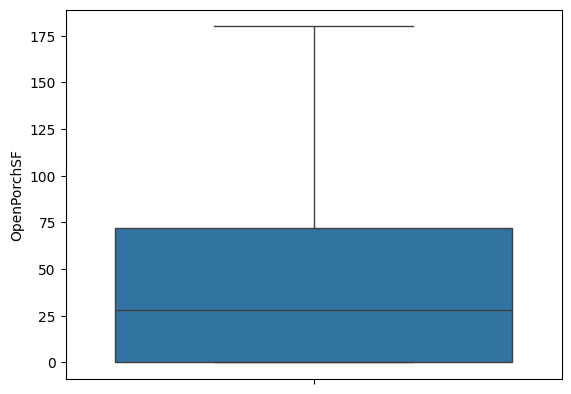

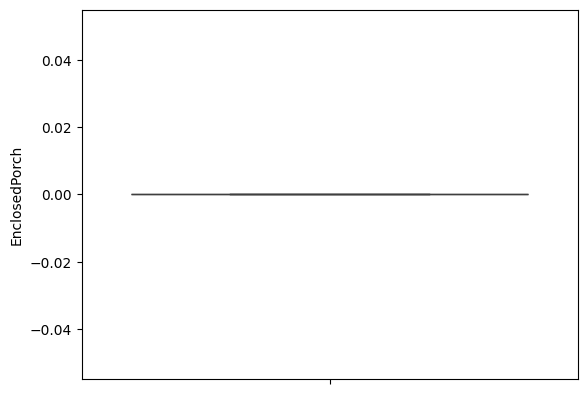

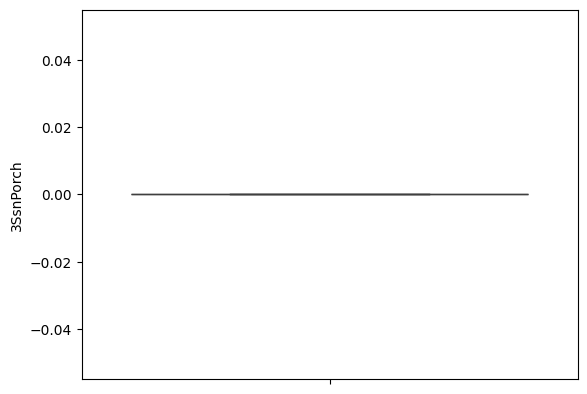

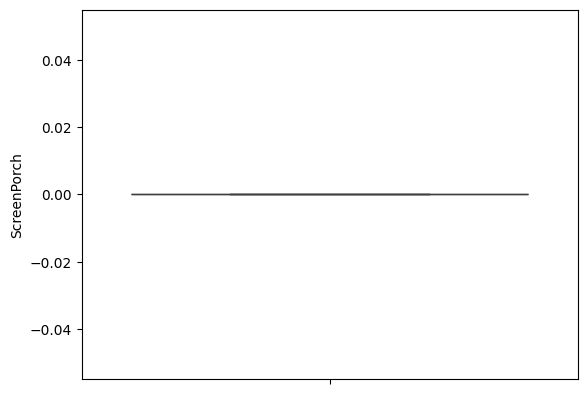

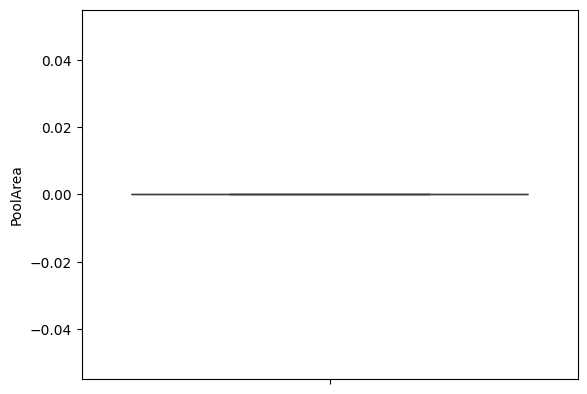

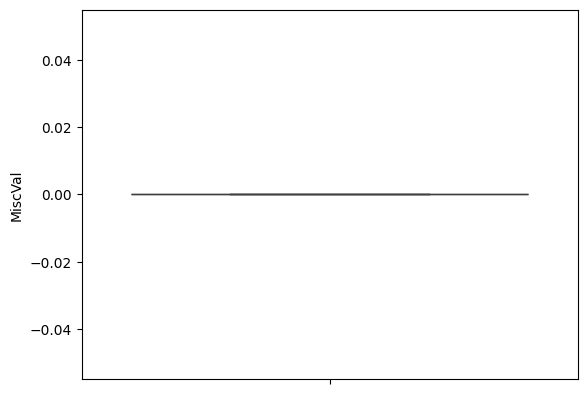

In [157]:
for i in['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']:
    sns.boxplot(test_data[i])
    plt.show()

In [158]:
#Do label incoding
dummy=pd.get_dummies(data=test_data,columns=["MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1",
  "Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual",
  "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional","FireplaceQu",
  "GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"],drop_first=True)


In [159]:
dummy

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20.0,80.0,11622.00,5.0,6.0,1961.0,1961.0,0.0,468.0,...,False,False,False,False,True,False,False,False,True,False
1,1462,20.0,81.0,14267.00,6.0,6.0,1958.0,1958.0,108.0,923.0,...,False,False,False,False,True,False,False,False,True,False
2,1463,60.0,74.0,13830.00,5.0,5.0,1997.0,1998.0,0.0,791.0,...,False,False,False,False,True,False,False,False,True,False
3,1464,60.0,78.0,9978.00,6.0,6.0,1998.0,1998.0,20.0,602.0,...,False,False,False,False,True,False,False,False,True,False
4,1465,120.0,43.0,5005.00,8.0,5.0,1992.0,1992.0,0.0,263.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,145.0,33.0,1936.00,4.0,7.0,1970.0,1970.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1455,2916,145.0,33.0,1894.00,4.0,5.0,1970.0,1970.0,0.0,252.0,...,False,False,False,False,True,False,False,False,False,False
1456,2917,20.0,105.0,17707.25,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,False,False,False,False,True,False,False,False,False,False
1457,2918,85.0,62.0,10441.00,5.0,5.0,1992.0,1992.0,0.0,337.0,...,False,False,False,False,True,False,False,False,True,False


In [160]:
numeric_columns = test_data.select_dtypes(include=['int64', 'float64'])

mean_1 = calc_mean(numeric_columns.values.flatten())
std_1 = calc_std(numeric_columns.values.flatten(), mean_1)

print("Mean:", mean_1)
print("Standard Deviation:", std_1)


Mean: 688.0459079710279
Standard Deviation: 1749.5701409586309


In [161]:
from sklearn.preprocessing import StandardScaler


test_data_scaled = test_data.copy()

scaler = StandardScaler()

scaled_numeric = scaler.fit_transform(numeric_columns)

test_data_scaled[numeric_columns.columns] = scaled_numeric

print(test_data_scaled.head())

         Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0 -1.730864   -0.934709       RH     0.702743  0.584370   Pave  67.0      Reg   
1 -1.728490   -0.934709       RL     0.761055  1.314169   Pave  67.0      IR1   
2 -1.726115    0.116040       RL     0.352870  1.193593   Pave  67.0      IR1   
3 -1.723741    0.116040       RL     0.586119  0.130764   Pave  67.0      IR1   
4 -1.721367    1.692162       RL    -1.454806 -1.241368   Pave  67.0      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         0.0      0.0   67.0  MnPrv        67.0   
1         Lvl    AllPub  ...         0.0      0.0   67.0   67.0        Gar2   
2         Lvl    AllPub  ...         0.0      0.0   67.0  MnPrv        67.0   
3         Lvl    AllPub  ...         0.0      0.0   67.0   67.0        67.0   
4         HLS    AllPub  ...         0.0      0.0   67.0   67.0        67.0   

  MiscVal    MoSold    YrSold  SaleTyp

# Data visulization

In [162]:
type(test_data)

pandas.core.frame.DataFrame

In [163]:
type(test_data.Id)

pandas.core.series.Series

In [164]:
test_data[test_data.LotFrontage==21.0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [165]:
test_data[(test_data["Street"]=="Pave")&(test_data["MoSold"]>=10)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
164,1625,20.0,RL,74.0,13008.0,Pave,67.0,IR1,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,10,2009,WD,Normal
169,1630,120.0,RL,33.0,7296.0,Pave,67.0,IR1,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,11,2009,WD,Normal
173,1634,60.0,RL,60.0,7500.0,Pave,67.0,Reg,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,10,2009,WD,Normal
175,1636,20.0,RL,58.0,7250.0,Pave,67.0,Reg,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,11,2009,WD,Normal
183,1644,60.0,FV,67.0,8470.0,Pave,67.0,Reg,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,10,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,2903,20.0,RL,95.0,13618.0,Pave,67.0,Reg,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,11,2006,New,Partial
1445,2906,90.0,RM,78.0,7020.0,Pave,67.0,Reg,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,11,2006,WD,Normal
1447,2908,20.0,RL,58.0,10172.0,Pave,67.0,IR1,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,10,2006,WD,Normal
1452,2913,145.0,RM,33.0,1533.0,Pave,67.0,Reg,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,12,2006,WD,Abnorml


In [166]:
filtered_data = test_data[test_data['LotFrontage']>50]
filtered_data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20.0,RH,80.0,11622.00,Pave,67.0,Reg,Lvl,AllPub,...,0.0,0.0,67.0,MnPrv,67.0,0.0,6,2010,WD,Normal
1,1462,20.0,RL,81.0,14267.00,Pave,67.0,IR1,Lvl,AllPub,...,0.0,0.0,67.0,67.0,Gar2,0.0,6,2010,WD,Normal
2,1463,60.0,RL,74.0,13830.00,Pave,67.0,IR1,Lvl,AllPub,...,0.0,0.0,67.0,MnPrv,67.0,0.0,3,2010,WD,Normal
3,1464,60.0,RL,78.0,9978.00,Pave,67.0,IR1,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,6,2010,WD,Normal
5,1466,60.0,RL,75.0,10000.00,Pave,67.0,IR1,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,4,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,2909,90.0,RL,67.0,11836.00,Pave,67.0,IR1,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,3,2006,WD,Normal
1451,2912,20.0,RL,80.0,13384.00,Pave,67.0,Reg,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,5,2006,WD,Normal
1456,2917,20.0,RL,105.0,17707.25,Pave,67.0,Reg,Lvl,AllPub,...,0.0,0.0,67.0,67.0,67.0,0.0,9,2006,WD,Abnorml
1457,2918,85.0,RL,62.0,10441.00,Pave,67.0,Reg,Lvl,AllPub,...,0.0,0.0,67.0,MnPrv,Shed,0.0,7,2006,WD,Normal


In [167]:
test_data.Id.iloc[10]

1471

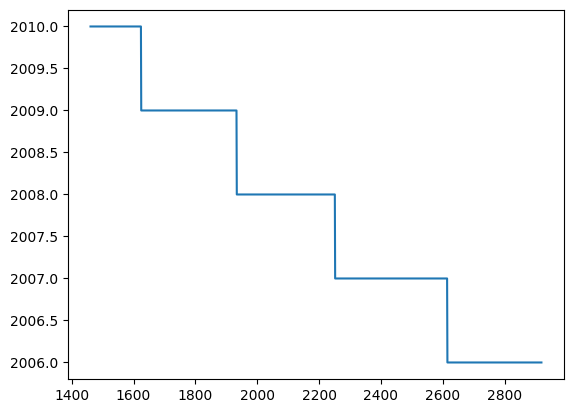

In [168]:
plt.plot(test_data.Id,test_data.YrSold)
plt.show()

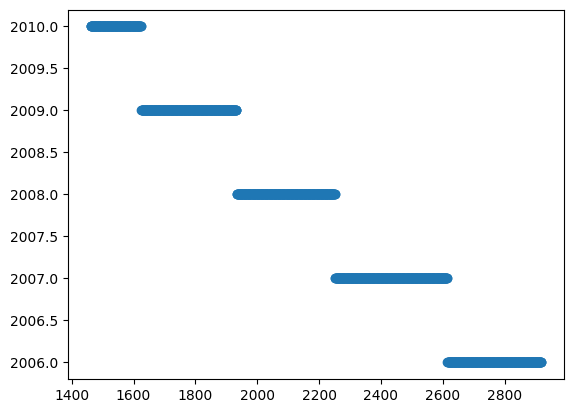

In [169]:
plt.plot(test_data.Id,test_data.YrSold,'o')
plt.show()

<Axes: >

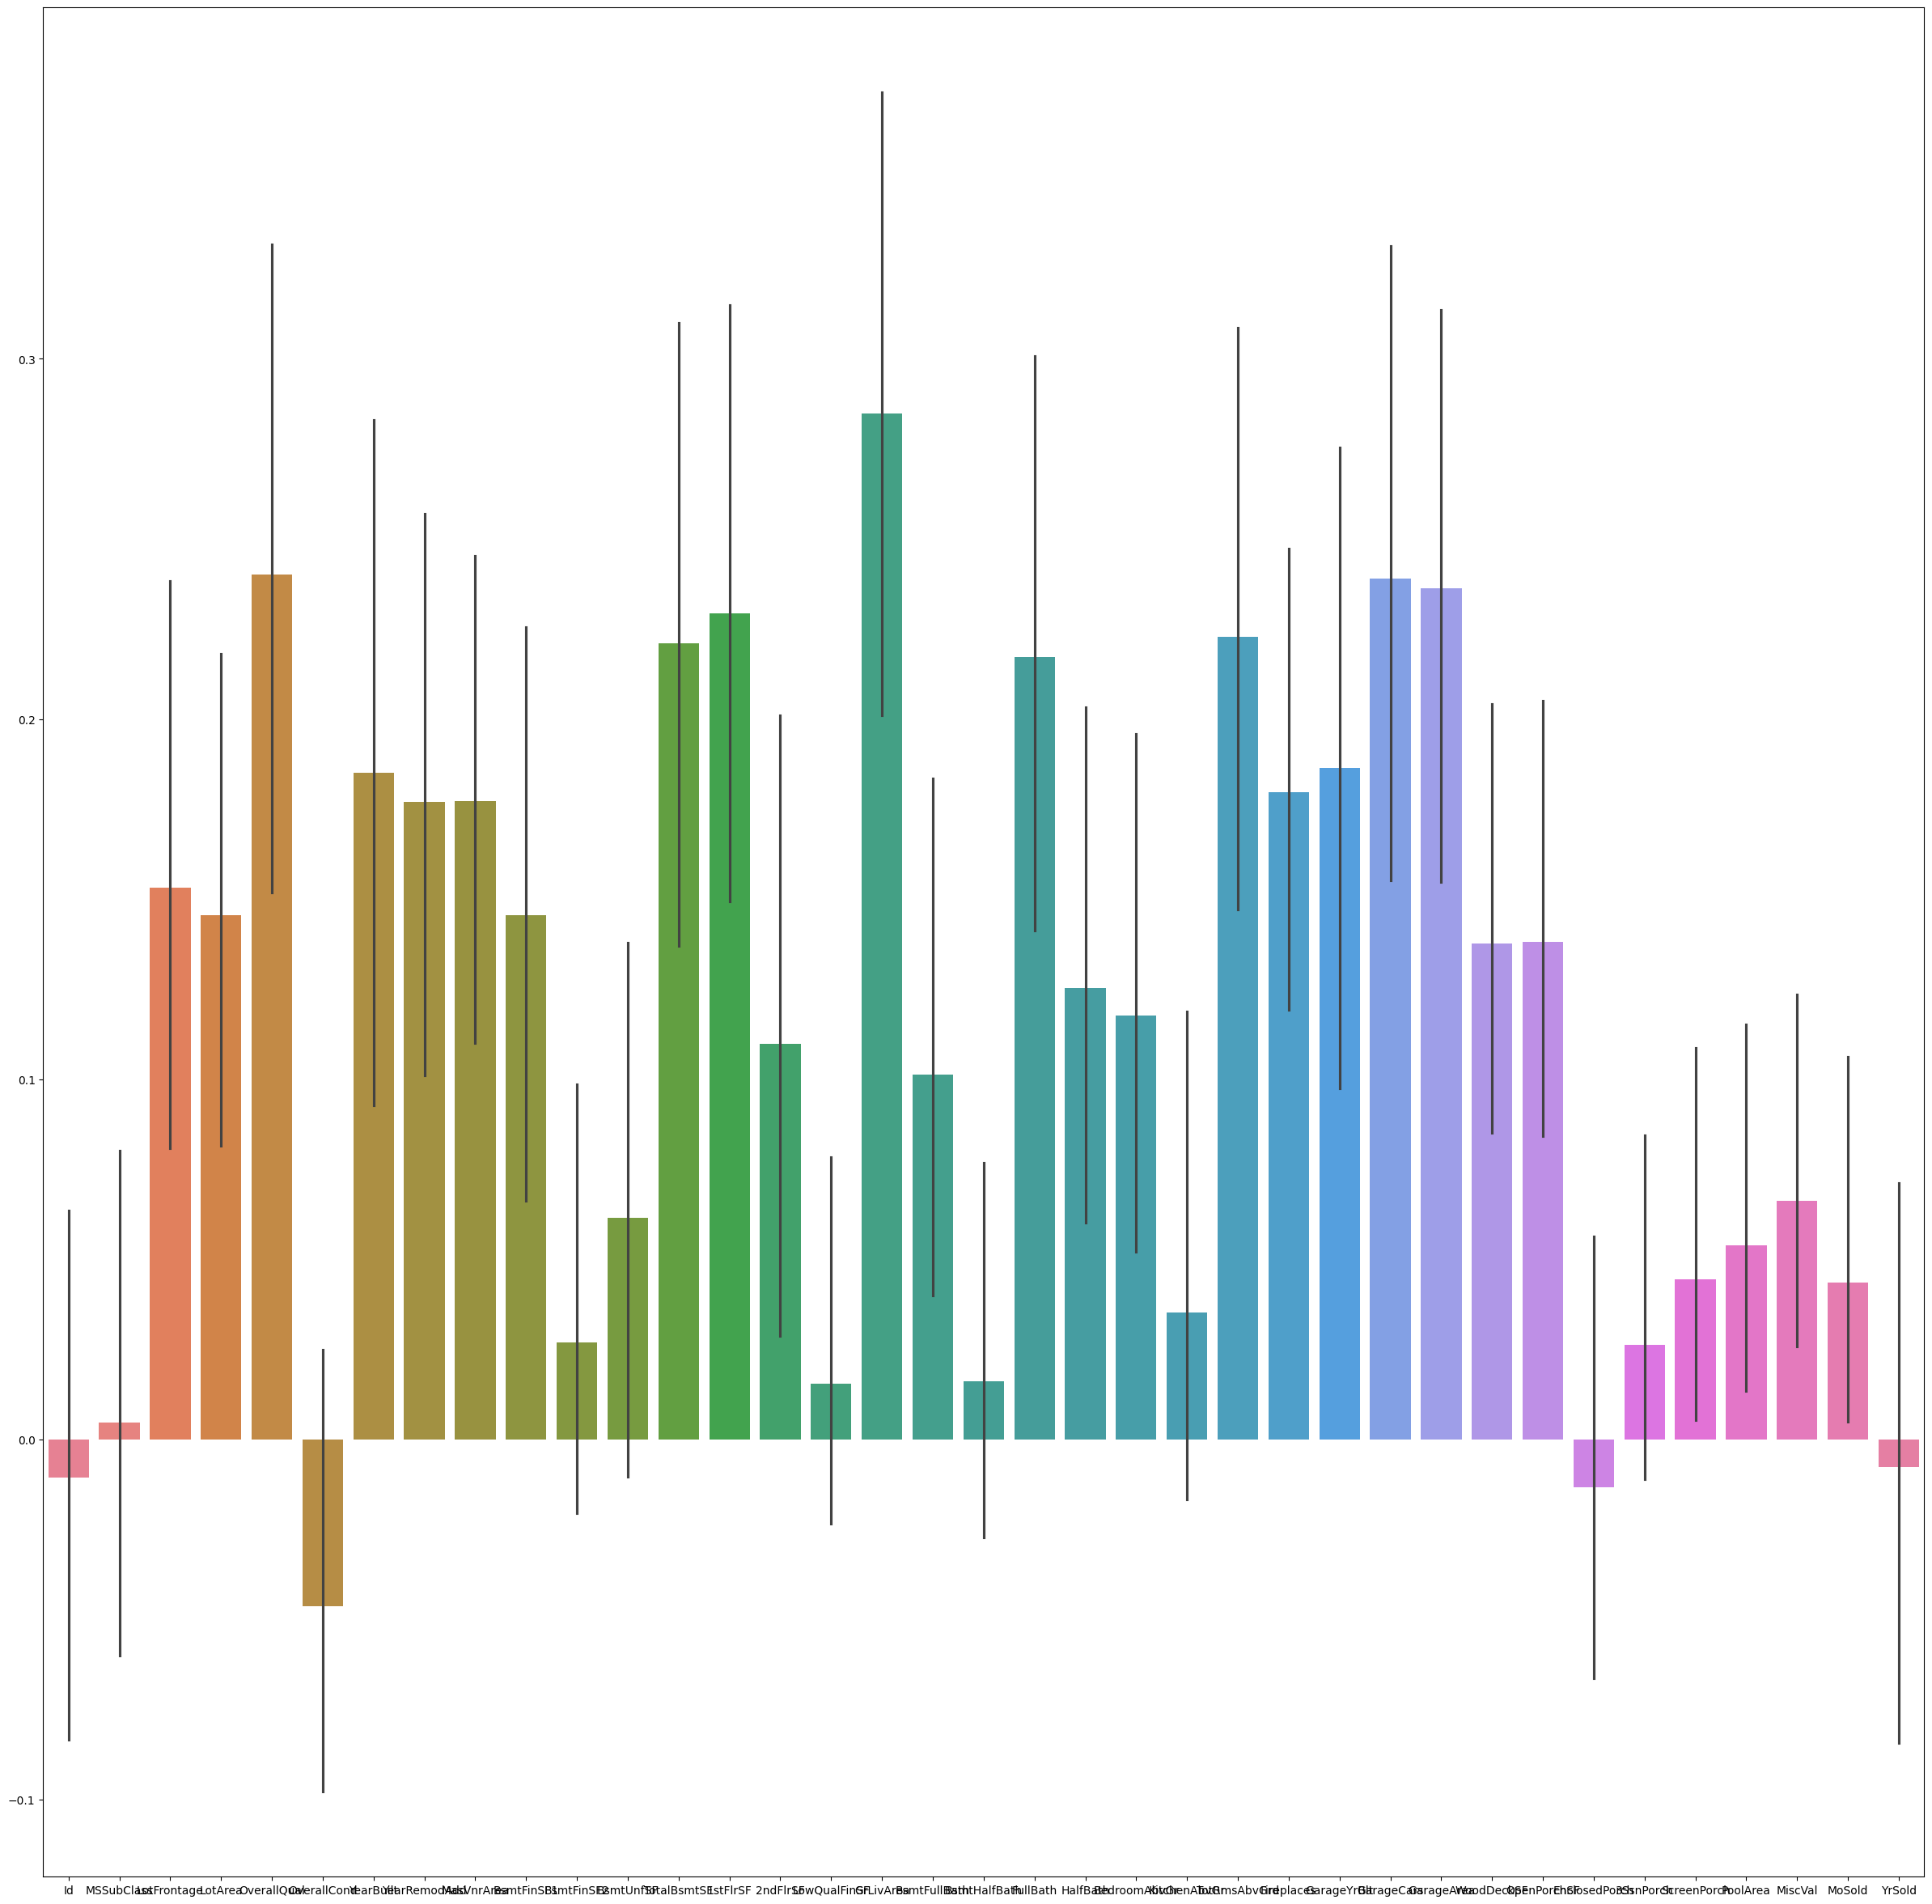

In [170]:
b=test_data.select_dtypes(include="number").corr()
plt.figure(figsize=(30,30))
sns.barplot(s)



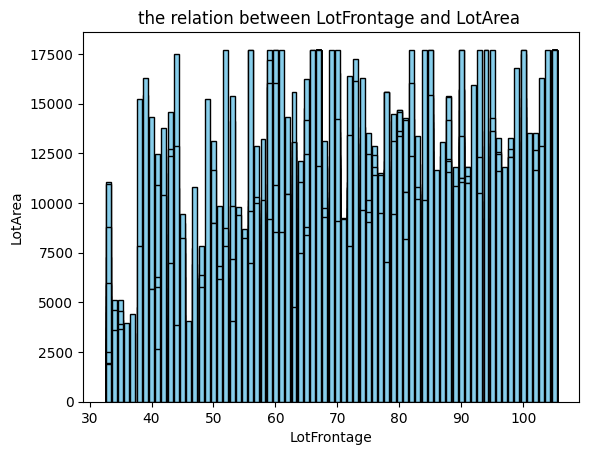

In [171]:
plt.bar(test_data['LotFrontage'], test_data['LotArea'], color='skyblue', edgecolor='black')
plt.xlabel('LotFrontage')
plt.ylabel('LotArea')
plt.title('the relation between LotFrontage and LotArea ')
plt.show()

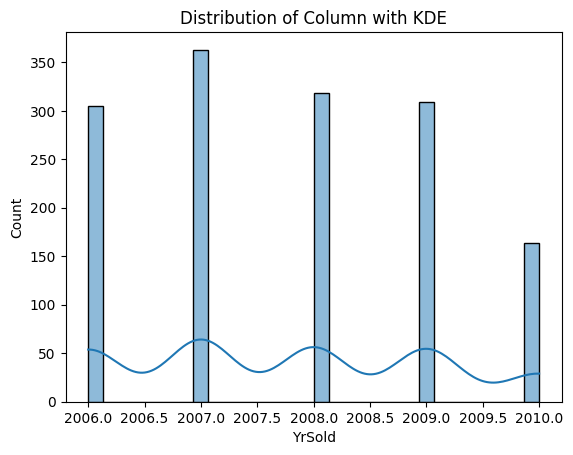

In [172]:
sns.histplot(test_data['YrSold'], bins=30, kde=True)
plt.title('Distribution of Column with KDE')
plt.show()

<Axes: xlabel='Id', ylabel='Density'>

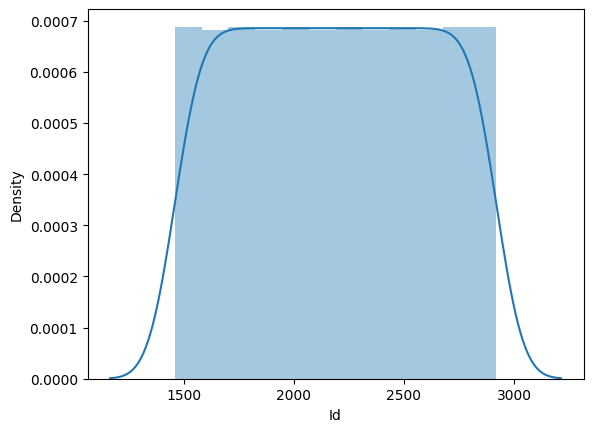

In [173]:
#for single column
sns.distplot(test_data['Id'])

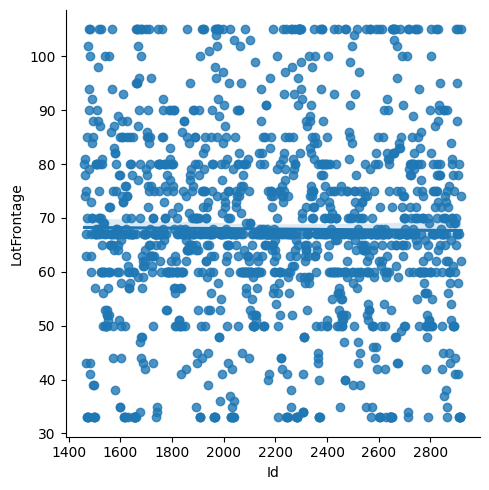

In [174]:
sns.lmplot(x="Id",y="LotFrontage",data=test_data)

<Axes: >

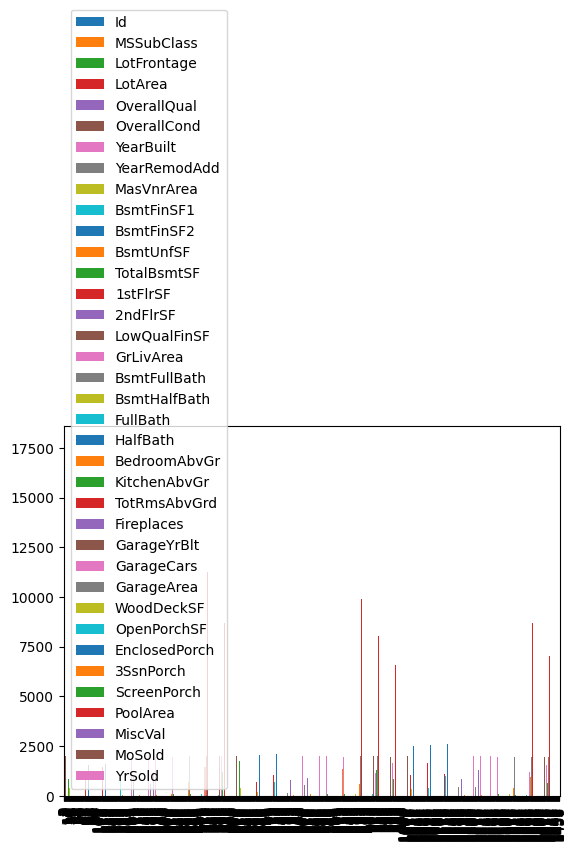

In [175]:
test_data.plot(kind="bar")

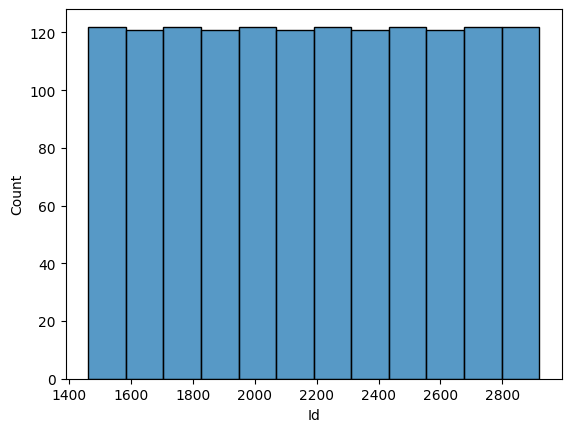

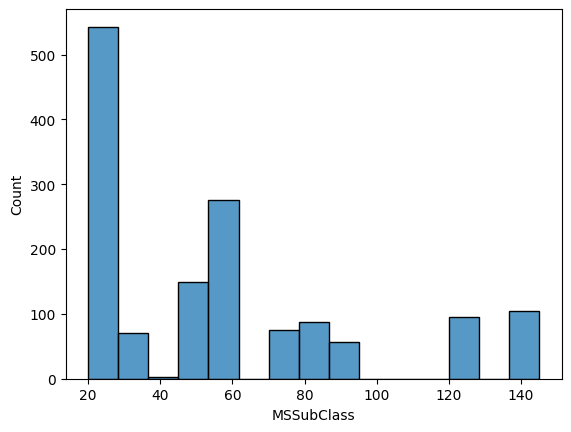

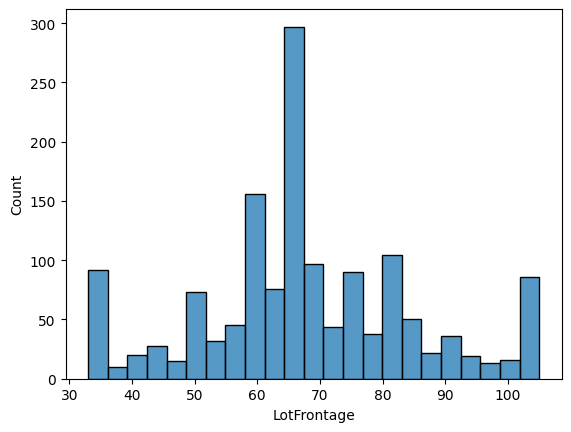

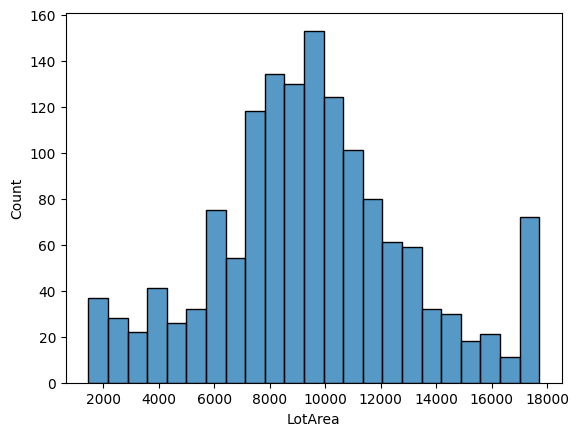

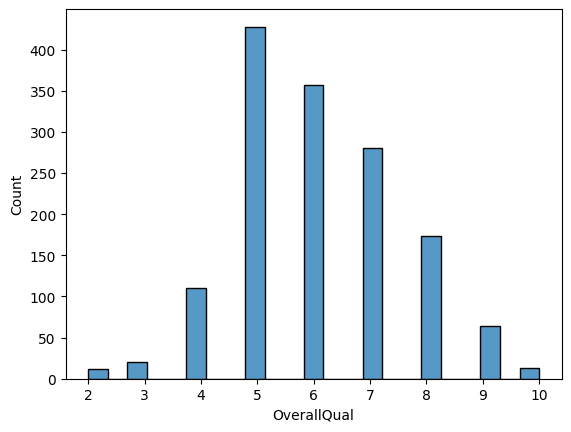

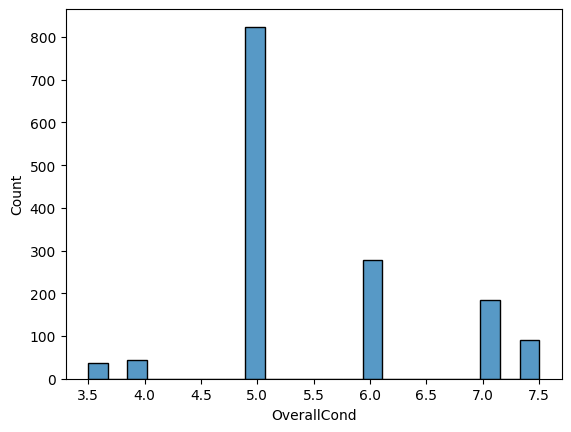

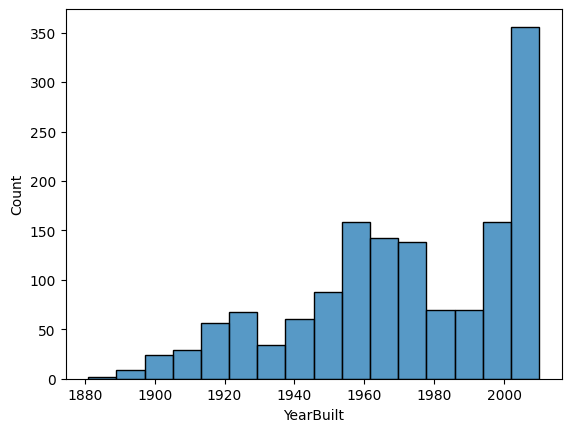

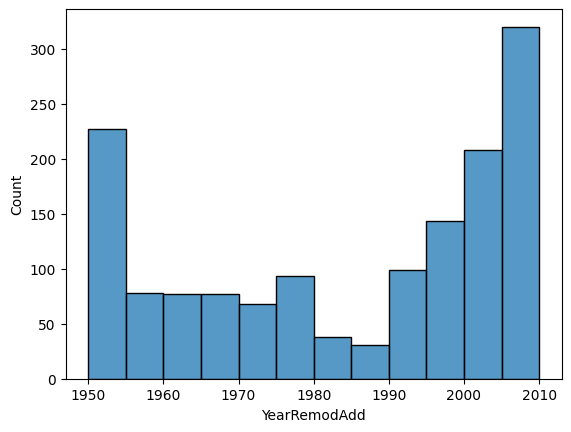

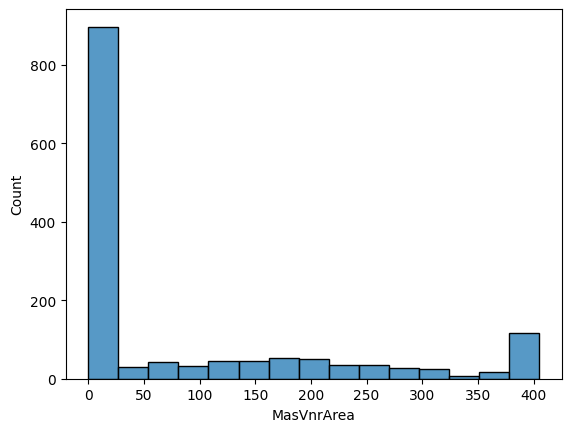

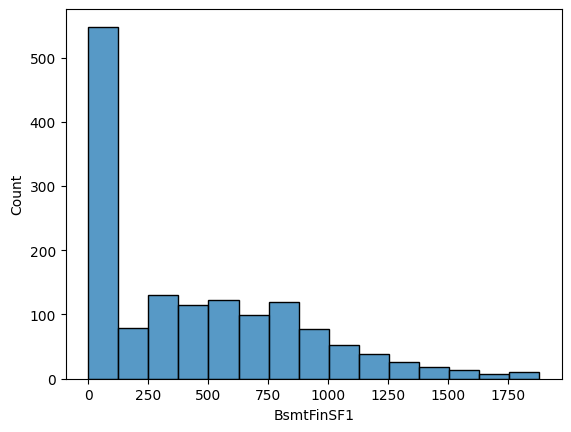

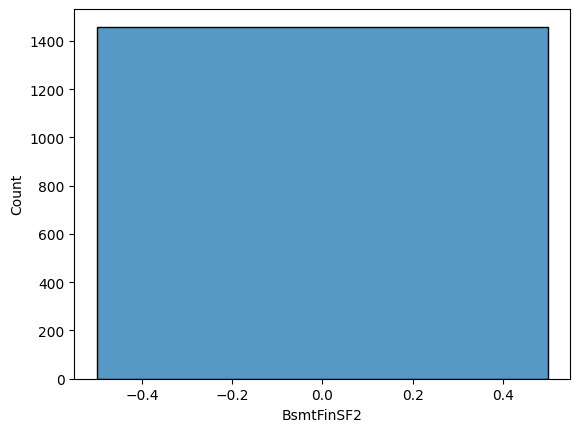

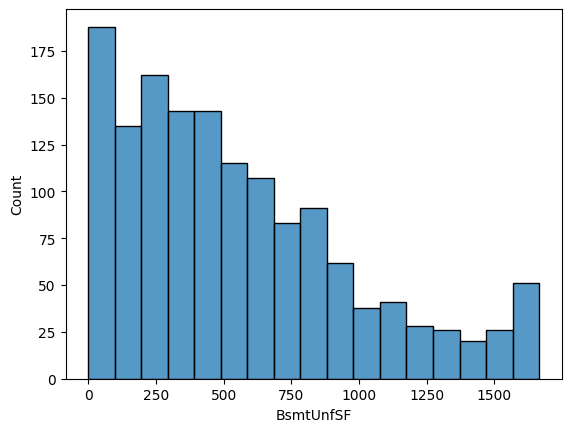

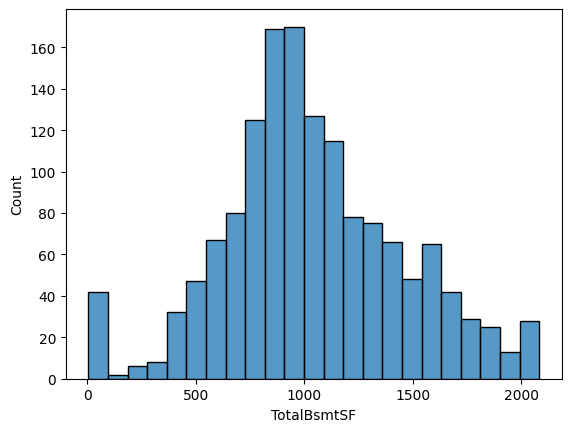

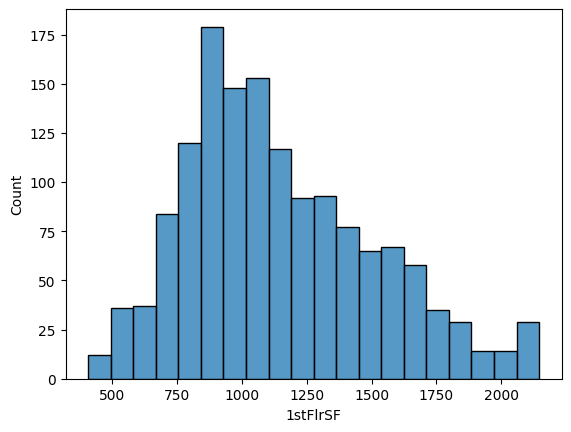

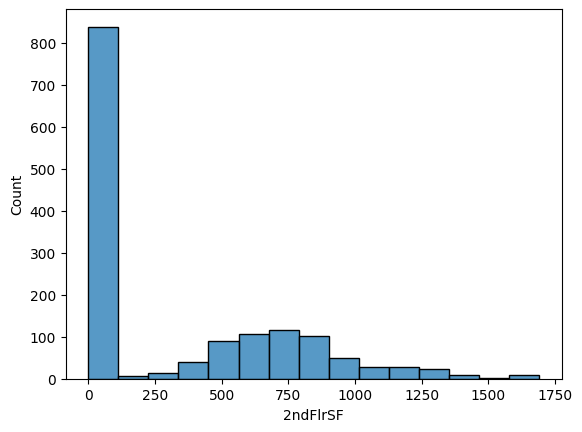

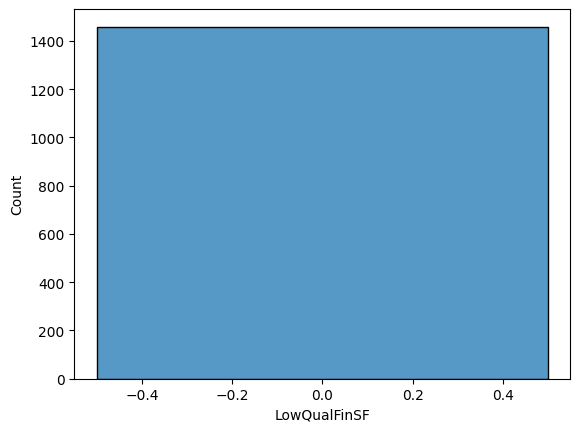

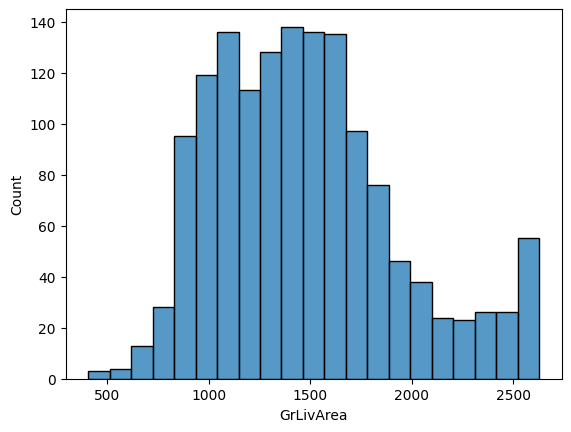

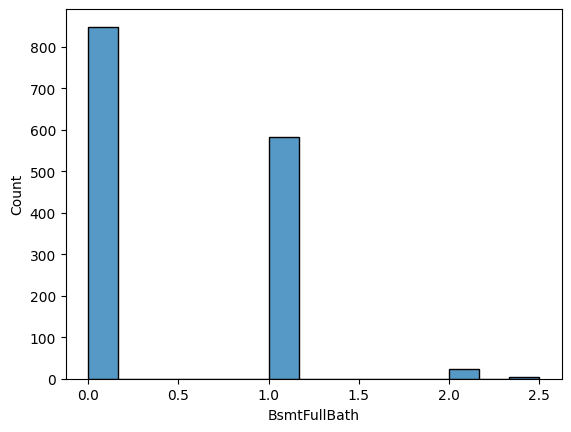

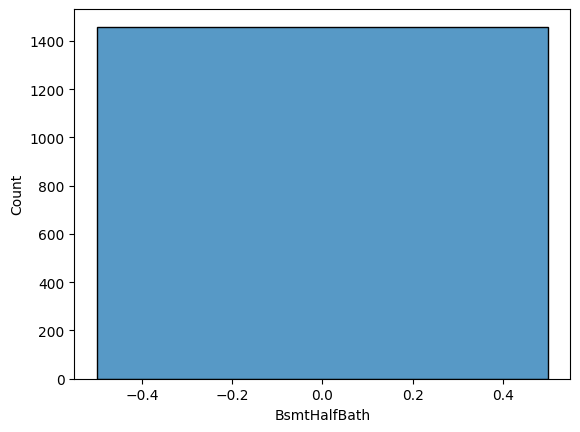

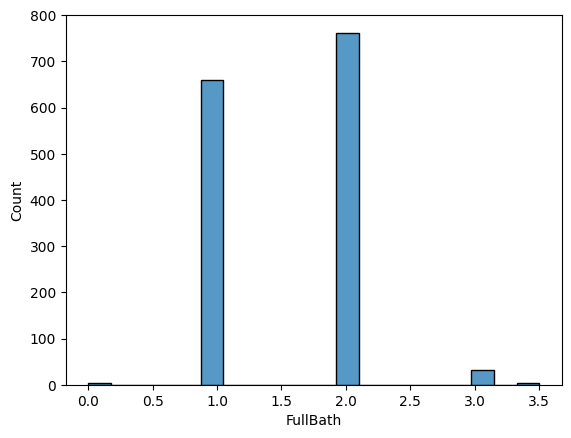

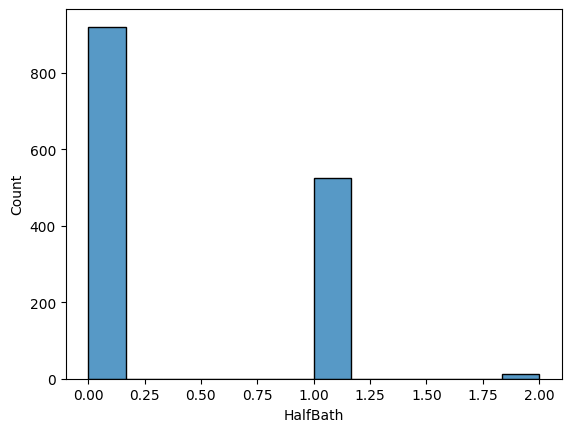

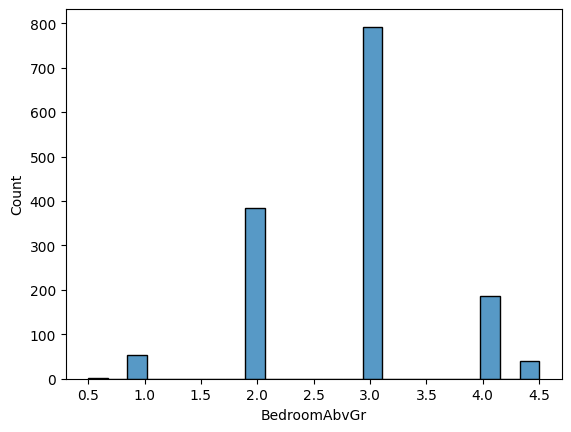

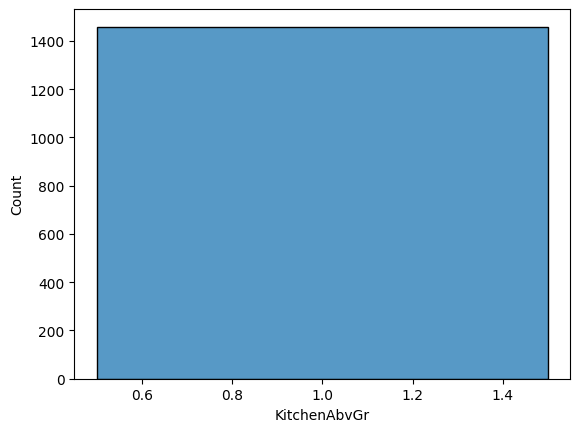

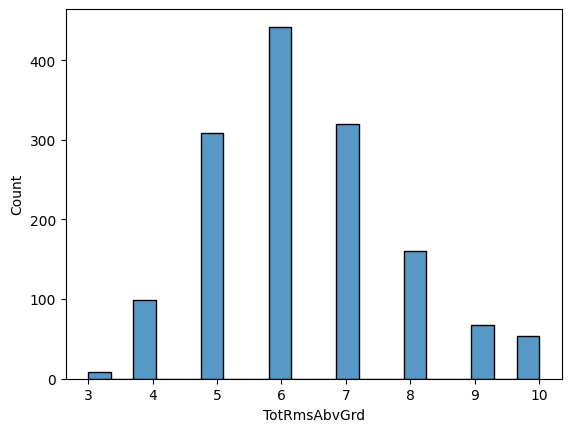

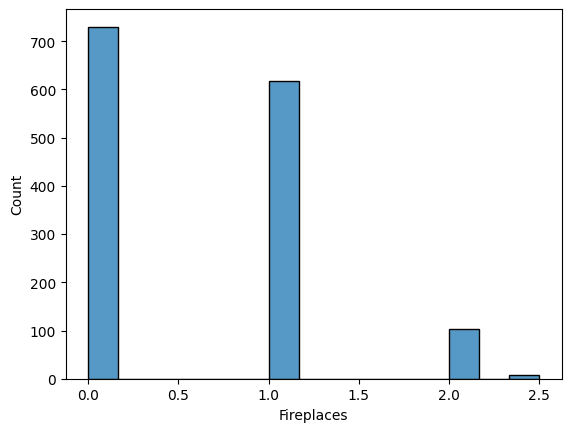

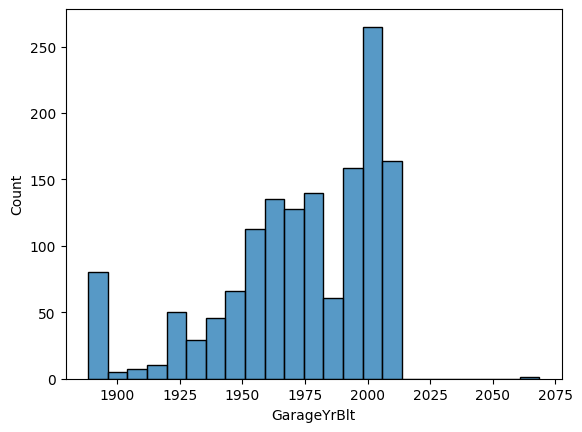

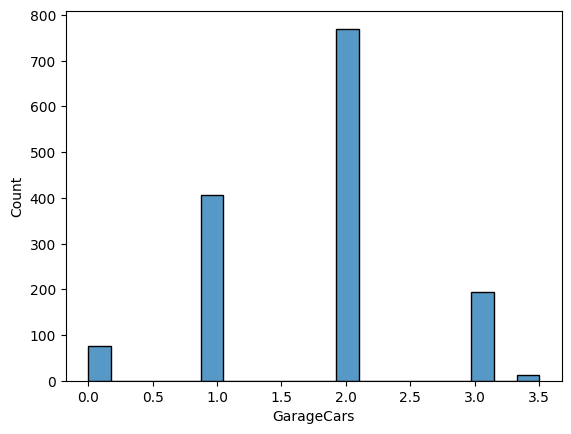

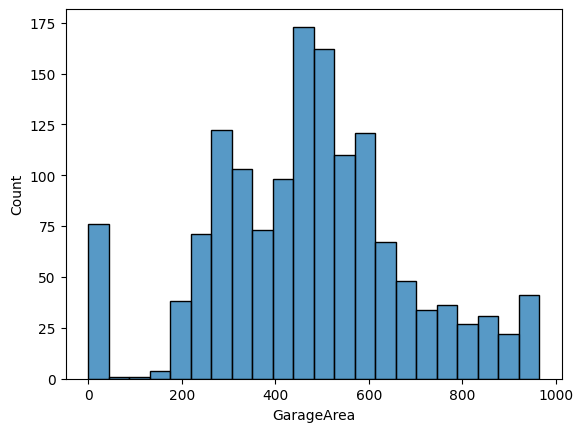

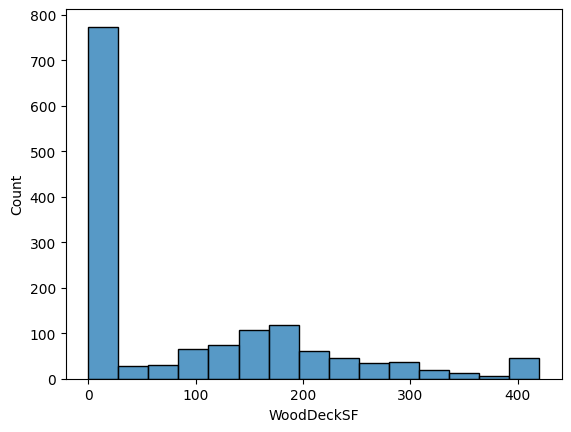

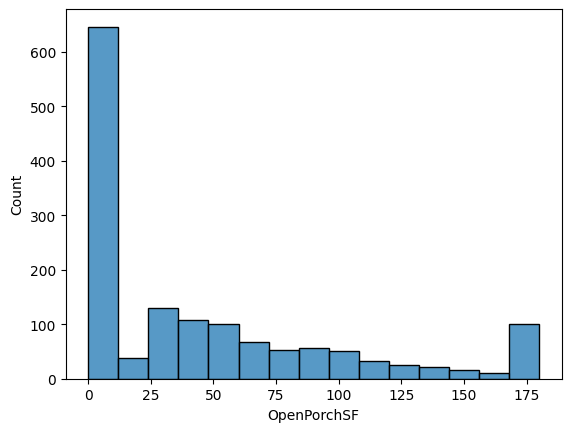

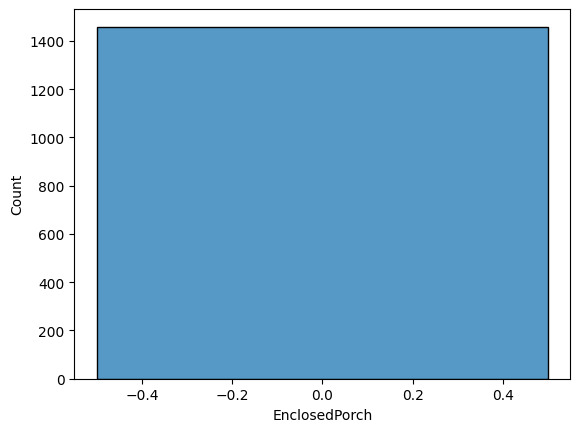

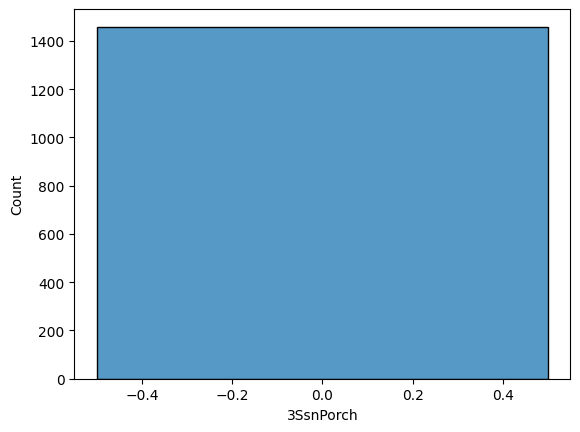

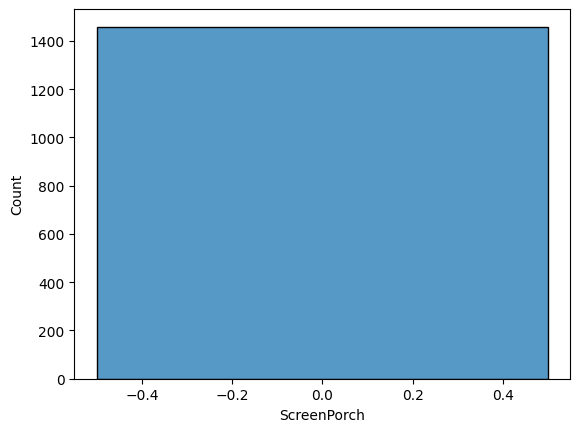

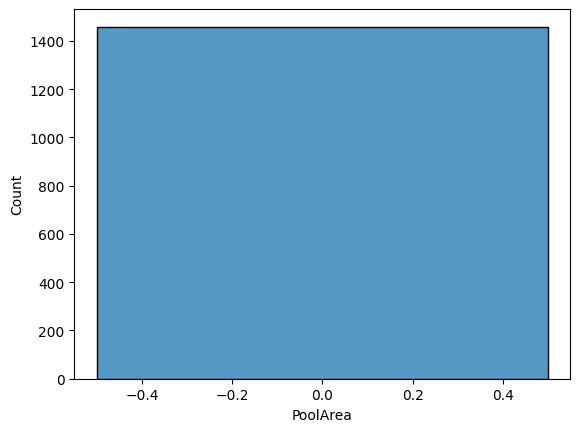

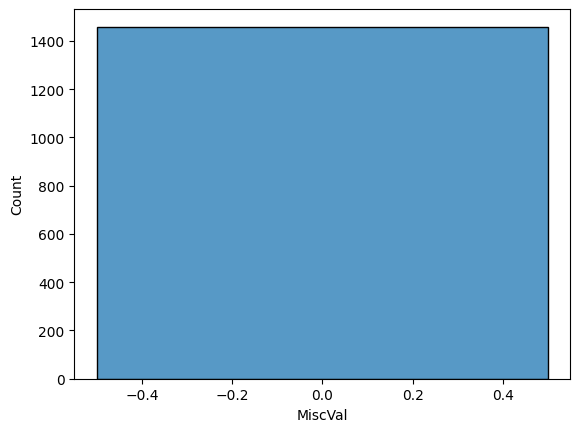

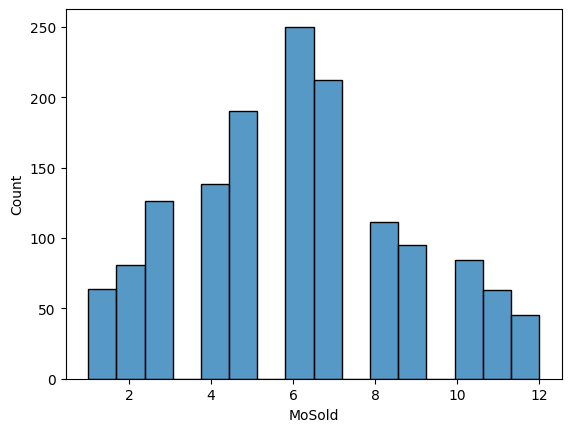

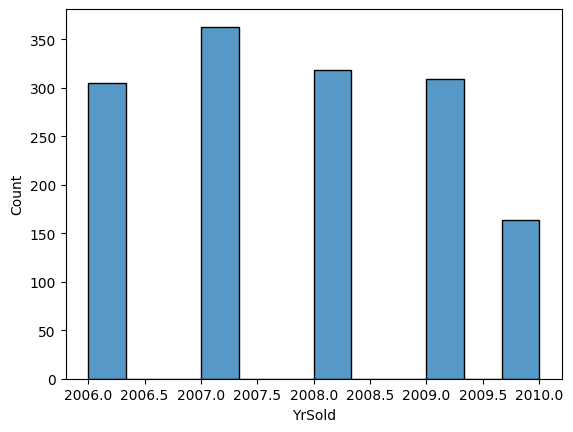

In [176]:
#histogram to understand the distribution(for each numerical column)
import warnings
warnings.filterwarnings("ignore")
for i in test_data.select_dtypes(include="number").columns:
    sns.histplot(data=test_data,x=i)
    plt.show()

In [177]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=test_data.select_dtypes(include="number").corr()

<Axes: >

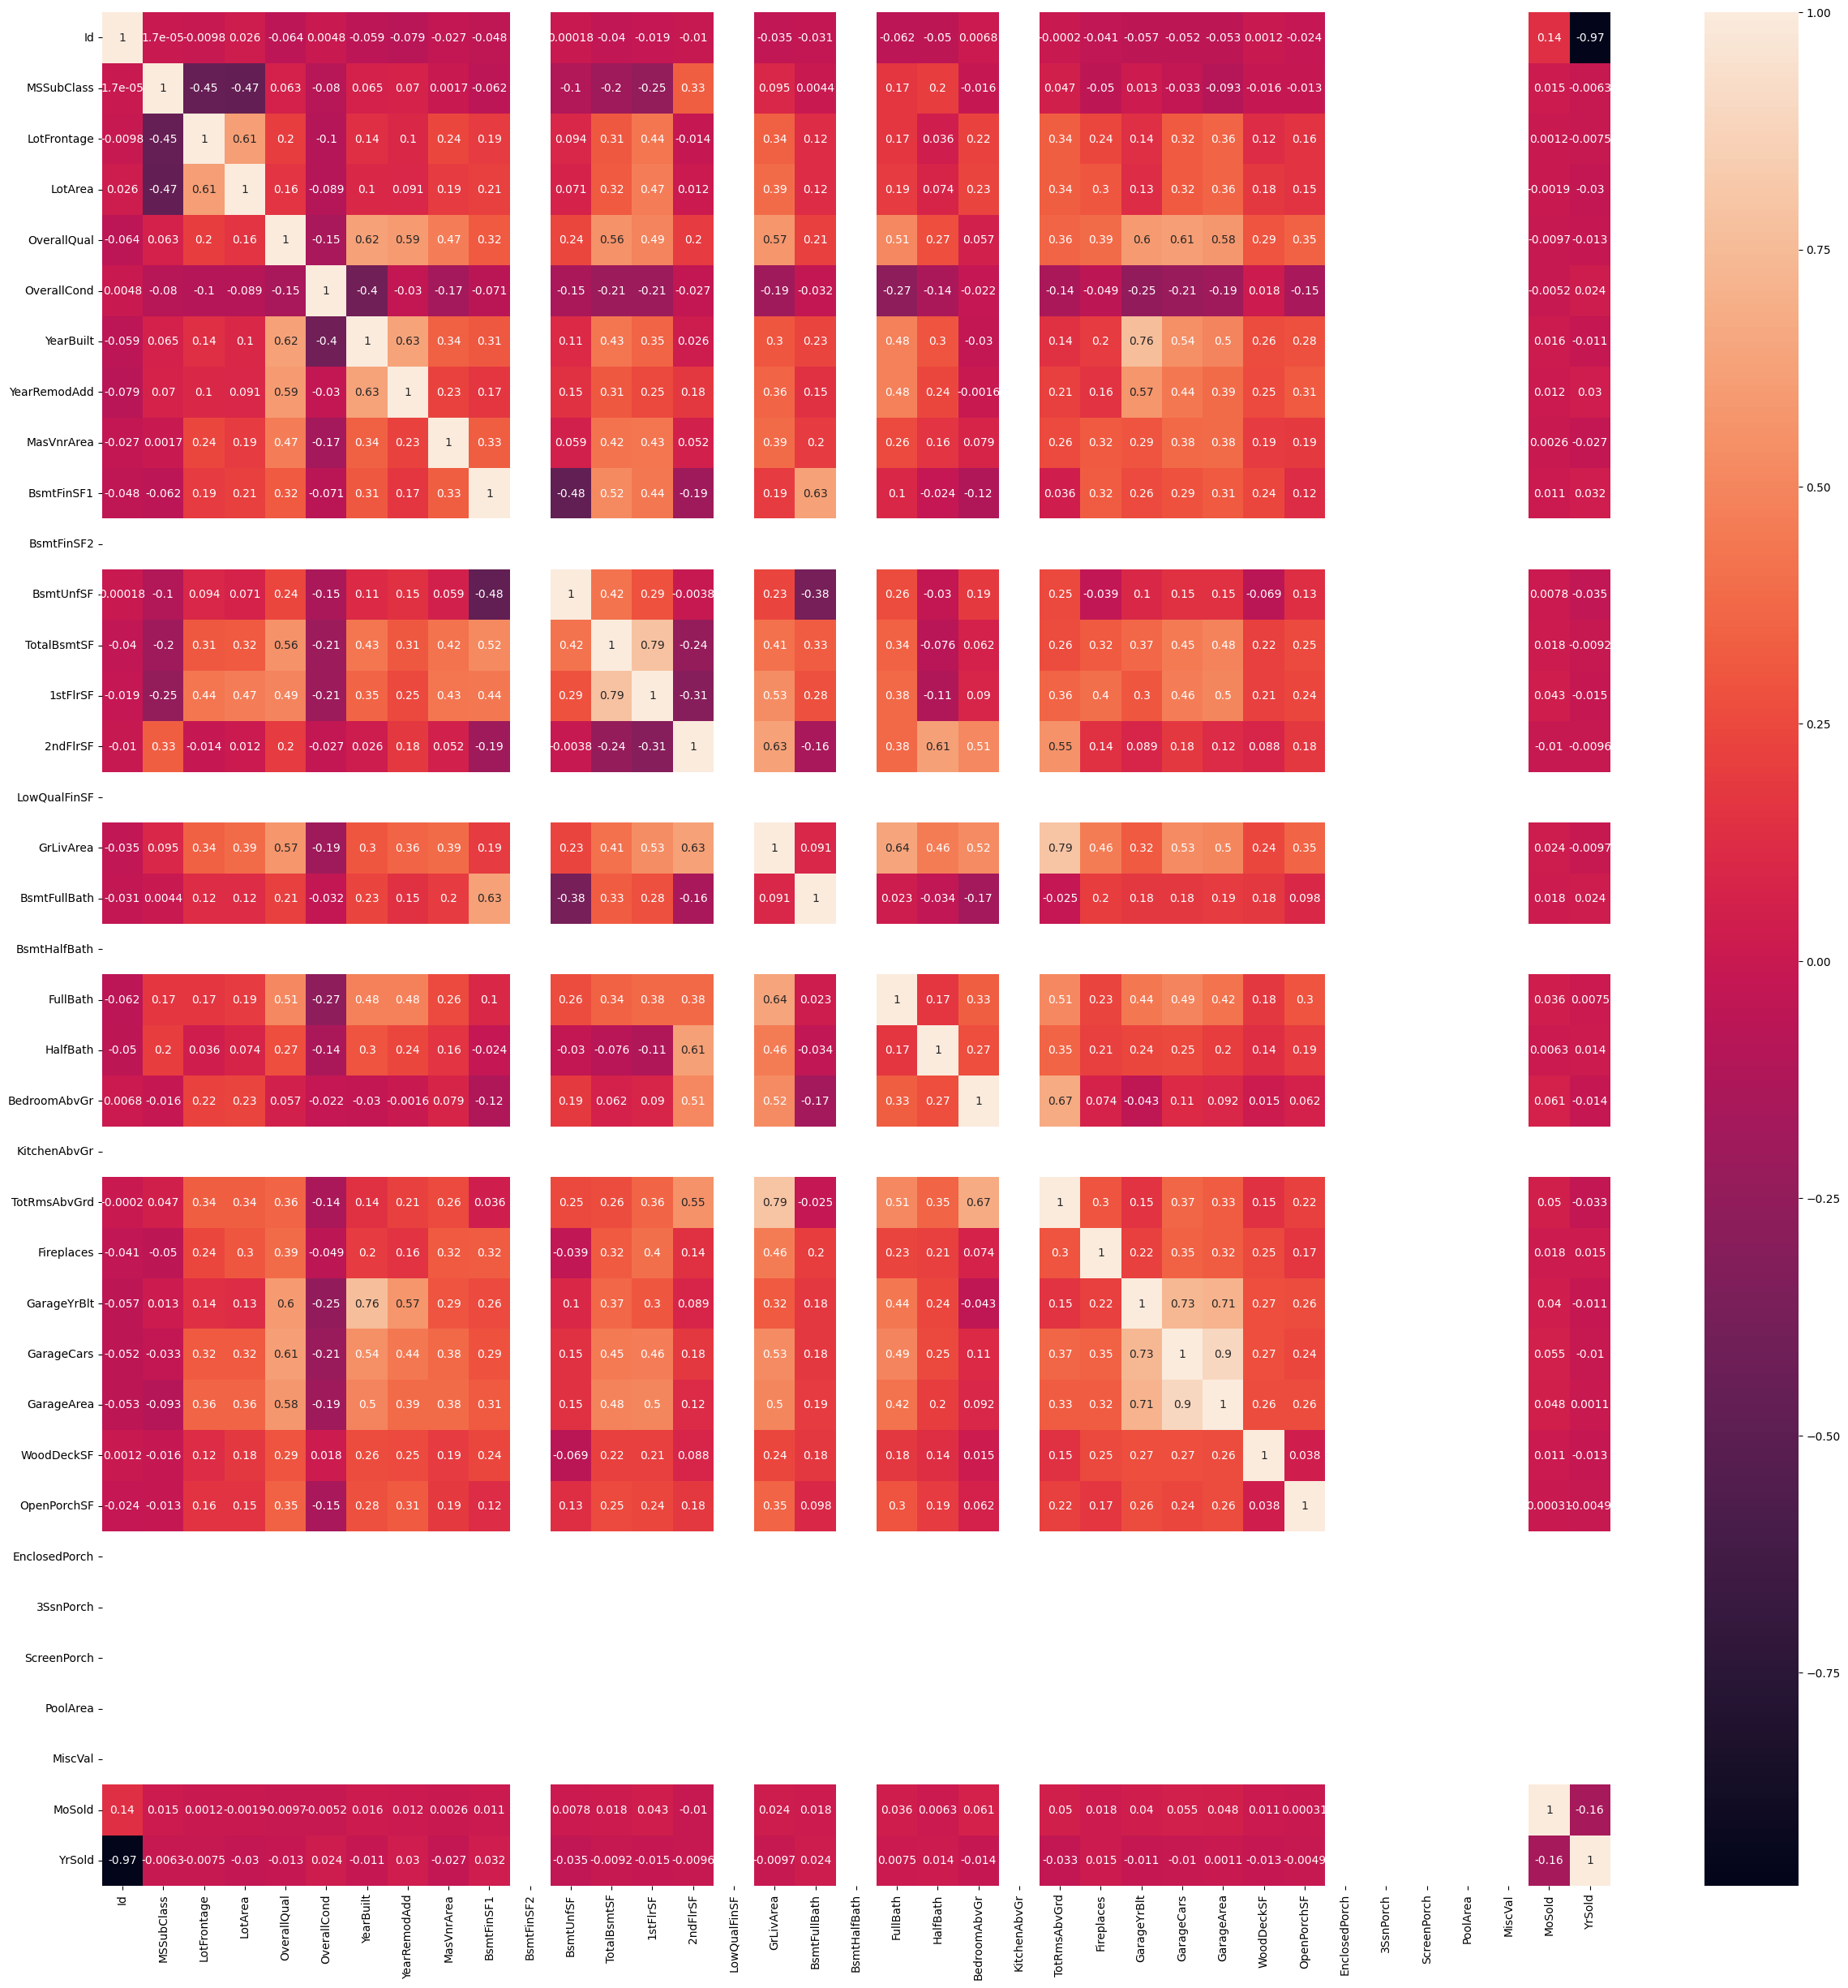

In [178]:
plt.figure(figsize=(30,30))
sns.heatmap(s,annot=True)

# Linear Regression

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [180]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2.5 * x + np.random.randn(100, 1)

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [182]:
model = LinearRegression()

In [183]:
model.fit(x_train, y_train)

LinearRegression()

In [184]:
y_pred = model.predict(x_test)
y_pred

array([[0.66252771],
       [1.56399634],
       [1.75268167],
       [0.70513682],
       [0.41534893],
       [2.02216217],
       [0.37033564],
       [1.75762248],
       [0.81801117],
       [0.75706119],
       [0.56450505],
       [0.63510735],
       [1.02508234],
       [2.51874661],
       [2.43848504],
       [0.95013392],
       [1.41742276],
       [0.603017  ],
       [1.6712199 ],
       [2.60907535]])

In [185]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,-0.055236,0.662528
1,0.307905,1.563996
2,1.972571,1.752682
3,1.079707,0.705137
4,-0.565509,0.415349
5,1.139792,2.022162
6,0.061046,0.370336
7,0.685675,1.757622
8,-0.113654,0.818011
9,1.139573,0.757061


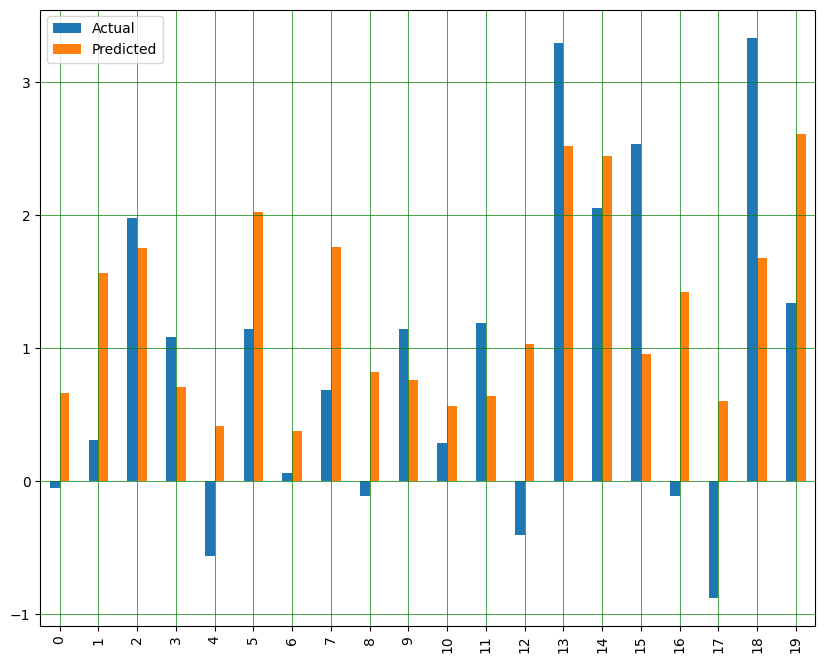

In [186]:
df1 = df.head(25)
df1.plot(kind='bar' , figsize=(10,8))
plt.grid(which='major' , linestyle='-' , linewidth='0.5' , color='green')
plt.grid(which='minor' , linestyle=':' , linewidth='0.5', color='black')
plt.show()

In [187]:
from sklearn import metrics

In [188]:
print('Mean Absolute Error is the average of all absolute errors. :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ' , metrics.mean_squared_error(y_test , y_pred))
print(' Roort Mean Squared Error : ' ,np.sqrt( metrics.mean_squared_error(y_test , y_pred)))

Mean Absolute Error is the average of all absolute errors. : 0.9036438483682604
Mean Squared Error :  1.0434333815695178
 Roort Mean Squared Error :  1.0214858694908695


In [189]:
model.score(x,y)

0.3286398596486154

In [190]:
from sklearn.metrics import mean_squared_error,r2_score
print('The Error of our detection Model is :', mean_squared_error(y_test,y_pred))

The Error of our detection Model is : 1.0434333815695178


In [191]:
print('The Accuracy of our detection Model is :', r2_score(y_test,y_pred))

The Accuracy of our detection Model is : 0.2712017988990748


In [192]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [193]:
print("معامل الخط (Slope):", model.coef_)

معامل الخط (Slope): [[2.37294302]]


In [194]:
print("الاعتراض (Intercept):", model.intercept_)

الاعتراض (Intercept): [0.32235853]


In [195]:
print("متوسط الخطأ التربيعي (MSE):", mse)

متوسط الخطأ التربيعي (MSE): 1.0434333815695178


In [196]:
print("معامل التحديد (R²):", r2)

معامل التحديد (R²): 0.2712017988990748


# Support Vector Regression

In [197]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


categorical_columns = train_data_without_target.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(train_data_without_target[categorical_columns])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

train_data_without_target = train_data_without_target.drop(columns=categorical_columns)
train_data_without_target = pd.concat([train_data_without_target, encoded_df], axis=1)

X = train_data_without_target
y = train_data_scaled['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.ravel()
y_test =y_test.ravel()

class SVR_from_scratch:
  def __init__(self, C, epsilon, learning_rate, epochs):
        self.C = C
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

  def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        self.weights = np.random.randn(X.shape[1])

        for epoch in range(self.epochs):
            predictions = X.dot(self.weights)
            errors = predictions - y

            hinge_loss = np.maximum(0, np.abs(errors) - self.epsilon)
            regularization_loss = 0.5 * np.sum(self.weights[1:]**2)
            total_loss = np.sum(hinge_loss) + self.C * regularization_loss

            gradient = X.T.dot(np.sign(errors) * (hinge_loss > 0)) / X.shape[0]
            gradient[1:] += self.C * self.weights[1:]

            self.weights -= self.learning_rate * gradient

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {total_loss}')

  def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X.dot(self.weights)

svr_model = SVR_from_scratch(C=1, epsilon=0.1, learning_rate=0.01, epochs=1000)
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score:{r2}')

Epoch 0, Loss: 484766179.45574665
Epoch 100, Loss: 123183199986.06851
Epoch 200, Loss: 168094878467.13333
Epoch 300, Loss: 184534016477.26343
Epoch 400, Loss: 190551274150.21402
Epoch 500, Loss: 192753785265.06918
Epoch 600, Loss: 193559975592.02008
Epoch 700, Loss: 193855067328.50986
Epoch 800, Loss: 193963080448.19055
Epoch 900, Loss: 194002616743.3405
Mean Squared Error: 3.318752752694779e+16
R² Score:-2.7287851145991524e+16


# Ridge Regression

In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score ,accuracy_score

X = train_data_without_target
y = train_data_scaled['SalePrice']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define the predict function
def predict(w, X, b):
    return np.dot(X, w) + b

#  compute loss with L2 regularization
def compute_loss(y_pred, y, w, lambda_):
    error = y_pred - y
    loss = np.mean(error**2) + lambda_ * np.sum(w**2)  # MSE + L2 regularization
    return loss

#  compute gradients (dw, db)
def compute_gradients(X, y, y_pred, w, lambda_):
    m = X.shape[0]  # Number of samples
    error = y_pred - y

    dw = (2 / m) * (np.dot(X.T, error) + lambda_ * w)
    db = (2 / m) * np.sum(error)

    return dw, db

# training loop
def epochs(w, X_train, b, y_train, lr, lambda_, epoch):
    m = X_train.shape[0]
    losses = []
    for i in range(epoch):
        # Make predictions
        y_pred = np.dot(X_train, w) + b

        # Compute the loss
        loss = compute_loss(y_pred, y_train, w, lambda_)

        # Compute gradients for weights and bias
        dw, db = compute_gradients(X_train, y_train, y_pred, w, lambda_)

        # Update weights and bias
        w -= lr * dw
        b -= lr * db

        # Append loss to the list
        losses.append(loss)

        # Print loss every 100 epochs
        if i % 10 == 0:
            print(f"Epoch {i}, Loss: {loss:.2f}")

    return w, b, losses

# Initialize weights and bias
w = np.random.randn(X_train.shape[1]) * 0.01
b = 0
lr = 0.01
lambda_ = 0.1
epoch = 100

# Training the model
print("Training Ridge Regression Model...")
w, b, losses = epochs(w, X_train, b, y_train, lr, lambda_, epoch)


Training Ridge Regression Model...
Epoch 0, Loss: 0.99
Epoch 10, Loss: 0.15
Epoch 20, Loss: 0.10
Epoch 30, Loss: 0.09
Epoch 40, Loss: 0.08
Epoch 50, Loss: 0.07
Epoch 60, Loss: 0.07
Epoch 70, Loss: 0.06
Epoch 80, Loss: 0.06
Epoch 90, Loss: 0.06


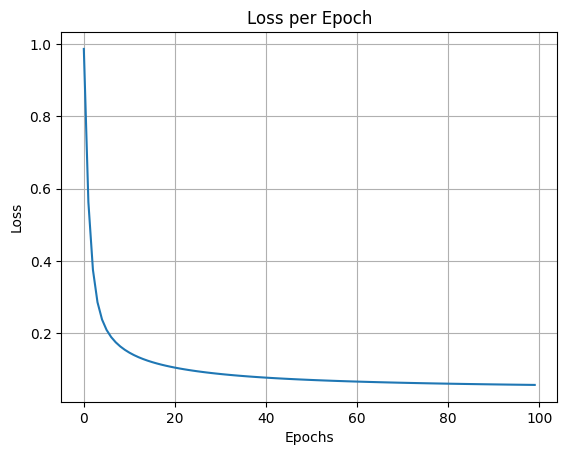

In [199]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [200]:
y_pred = predict(w, X_test, b)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Root Mean Squared Error (RMSE): 0.28
R² Score: 0.94


# Lasso Regression

In [201]:

def model(W, b, X):
    return np.dot(X, W) + b
def lasso_loss_function(W, b, X, y, alpha):
    num_samples = len(y)
    predictions = model(W, b, X)
    mse_loss = (0.5 / num_samples) * np.sum((predictions - y) ** 2)
    l1_penalty = alpha * np.sum(np.abs(W))
    return mse_loss + l1_penalty

def initialize_parameters(n_features):
    W = np.zeros(n_features)
    b = 0.0
    return W, b
def compute_gradients(W, b, X, y, alpha):
    num_samples = len(y)
    predictions = model(W, b, X)

    dW = (1.0 / num_samples) * np.dot(X.T, (predictions - y))
    db = (1.0 / num_samples) * np.sum(predictions - y)

    dW += alpha * np.sign(W)

    return dW, db

def update_parameters(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b


def train_lasso(X, y, alpha, learning_rate, epochs, tolerance=1e-4):
    n_features = X.shape[1]
    W, b = initialize_parameters(n_features)
    losses = []
    prev_loss = float('inf')

    for epoch in range(epochs):

        loss = lasso_loss_function(W, b, X, y, alpha)
        losses.append(loss)


        if abs(prev_loss - loss) < tolerance:
            print(f"Early stopping at epoch {epoch+1}")
            break
        prev_loss = loss


        dW, db = compute_gradients(W, b, X, y, alpha)


        W, b = update_parameters(W, b, dW, db, learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}: Loss = {loss:.4f}")

    return W, b, losses

def feature_selection(W, feature_names):
    feature_coefficients = {feature_names[i]: W[i] for i in range(len(feature_names))}
    selected_features = {name: coef for name, coef in feature_coefficients.items() if abs(coef) > 1e-5}
    return feature_coefficients, selected_features

Epoch 10: Loss = 0.3820
Epoch 20: Loss = 0.3090
Epoch 30: Loss = 0.2564
Epoch 40: Loss = 0.2182
Epoch 50: Loss = 0.1901
Epoch 60: Loss = 0.1691
Epoch 70: Loss = 0.1533
Epoch 80: Loss = 0.1411
Epoch 90: Loss = 0.1315
Epoch 100: Loss = 0.1239
Epoch 110: Loss = 0.1178
Epoch 120: Loss = 0.1127
Epoch 130: Loss = 0.1084
Epoch 140: Loss = 0.1047
Epoch 150: Loss = 0.1015
Epoch 160: Loss = 0.0987
Epoch 170: Loss = 0.0963
Epoch 180: Loss = 0.0940
Epoch 190: Loss = 0.0920
Epoch 200: Loss = 0.0902
Epoch 210: Loss = 0.0885
Epoch 220: Loss = 0.0870
Epoch 230: Loss = 0.0856
Epoch 240: Loss = 0.0842
Epoch 250: Loss = 0.0830
Epoch 260: Loss = 0.0819
Epoch 270: Loss = 0.0808
Early stopping at epoch 276

Number of features before selection: 276
Number of features after selection: 237

Feature Coefficients:
Id: -0.0015
MSSubClass: -0.0085
LotFrontage: 0.0169
LotArea: 0.0231
OverallQual: 0.0584
OverallCond: 0.0085
YearBuilt: 0.0162
YearRemodAdd: 0.0231
MasVnrArea: 0.0318
BsmtFinSF1: 0.0270
BsmtFinSF2: 0.00

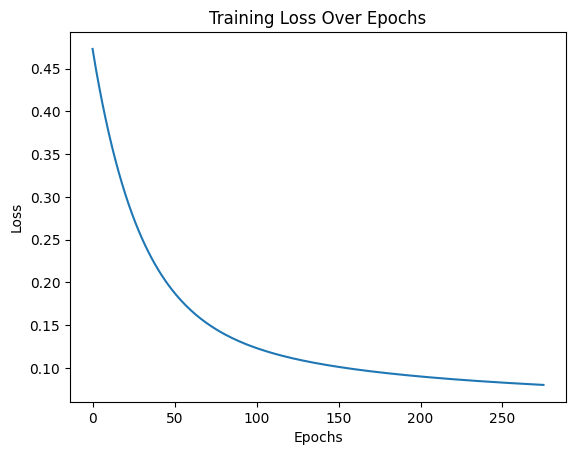

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

X = train_data_without_target
y = train_data_scaled['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


learning_rate = 0.001
alpha = 0.01
epochs = 5000


W, b, losses = train_lasso(X_train_scaled, y_train, alpha, learning_rate, epochs)


feature_names = X_train.columns
feature_coefficients, selected_features = feature_selection(W, feature_names)

print(f"\nNumber of features before selection: {len(feature_names)}")
print(f"Number of features after selection: {len(selected_features)}")

print("\nFeature Coefficients:")
for name, coef in feature_coefficients.items():
    print(f"{name}: {coef:.4f}")

print("\nSelected Features (Non-zero coefficients):")
for name, coef in selected_features.items():
    print(f"{name}: {coef:.4f}")


y_pred_train = model(W, b, X_train_scaled)
train_mse = mean_squared_error(y_train, y_pred_train)
print(f"\nTraining MSE: {train_mse:.4f}")


y_pred_test = model(W, b, X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Testing MSE: {test_mse:.4f}")


plt.plot(range(len(losses)), losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
